## Credit Card Fraud Detection

In this project we will predict fraudulent credit card transactions with the help of Machine learning models. 

### Problem Statement

The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

 

In this project, you will analyse customer-level data which has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group. 

 

The dataset is taken from the Kaggle website and it has a total of 2,84,807 transactions, out of which 492 are fraudulent. Since the dataset is highly imbalanced, so it needs to be handled before model building.

 

Business Problem Overview
For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.


It has been estimated by Nilson report that by 2020 the banking frauds would account to $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing with new and different ways. 

 

In the banking industry, credit card fraud detection using machine learning is not just a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees, and denials of legitimate transactions.

 

Understanding and Defining Fraud
Credit card fraud is any dishonest act and behaviour to obtain information without the proper authorization from the account holder for financial gain. Among different ways of frauds, Skimming is the most common one, which is the way of duplicating of information located on the magnetic strip of the card.  Apart from this, the other ways are:

Manipulation/alteration of genuine cards
Creation of counterfeit cards
Stolen/lost credit cards
Fraudulent telemarketing

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
sn.set(style="darkgrid")
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import log_loss
from datetime import datetime as dt
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV

import warnings
warnings.filterwarnings("ignore")
import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 100)


RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier


#TRAIN/VALIDATION/TEST SPLIT
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation



RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

IS_LOCAL = False
task_type='GPU'


In [ ]:
!pip install catboost

     |████████████████████████████████| 66.1MB 44kB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory data analysis

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Get the column names
print([i for i in df.columns])

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [ ]:
#Get high level statistical view of the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#Let's check if there is any missing data.
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V15,Amount,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Checking data unbalance 

In [ ]:
temp = df["Class"].value_counts()
data_df = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x = data_df['Class'],y = data_df['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Red"),
    text=data_df['values']
)
data = [trace]
layout = dict(title = 'Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)',
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=700
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

Only **492** (or **0.172%**) of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable **Class**.

In [ ]:
#Get percentage fradulent information
not_fraud=df[df['Class']==0].shape[0]
fraud=df[df['Class']==1].shape[0]
total=fraud+not_fraud

print("Percentage of Fradulent transaction: {}".format(np.round(100*fraud/total,4)))
print("Percentage of Non Fradulent transaction: {}".format(np.round(100*not_fraud/total,4)))

Percentage of Fradulent transaction: 0.1727
Percentage of Non Fradulent transaction: 99.8273


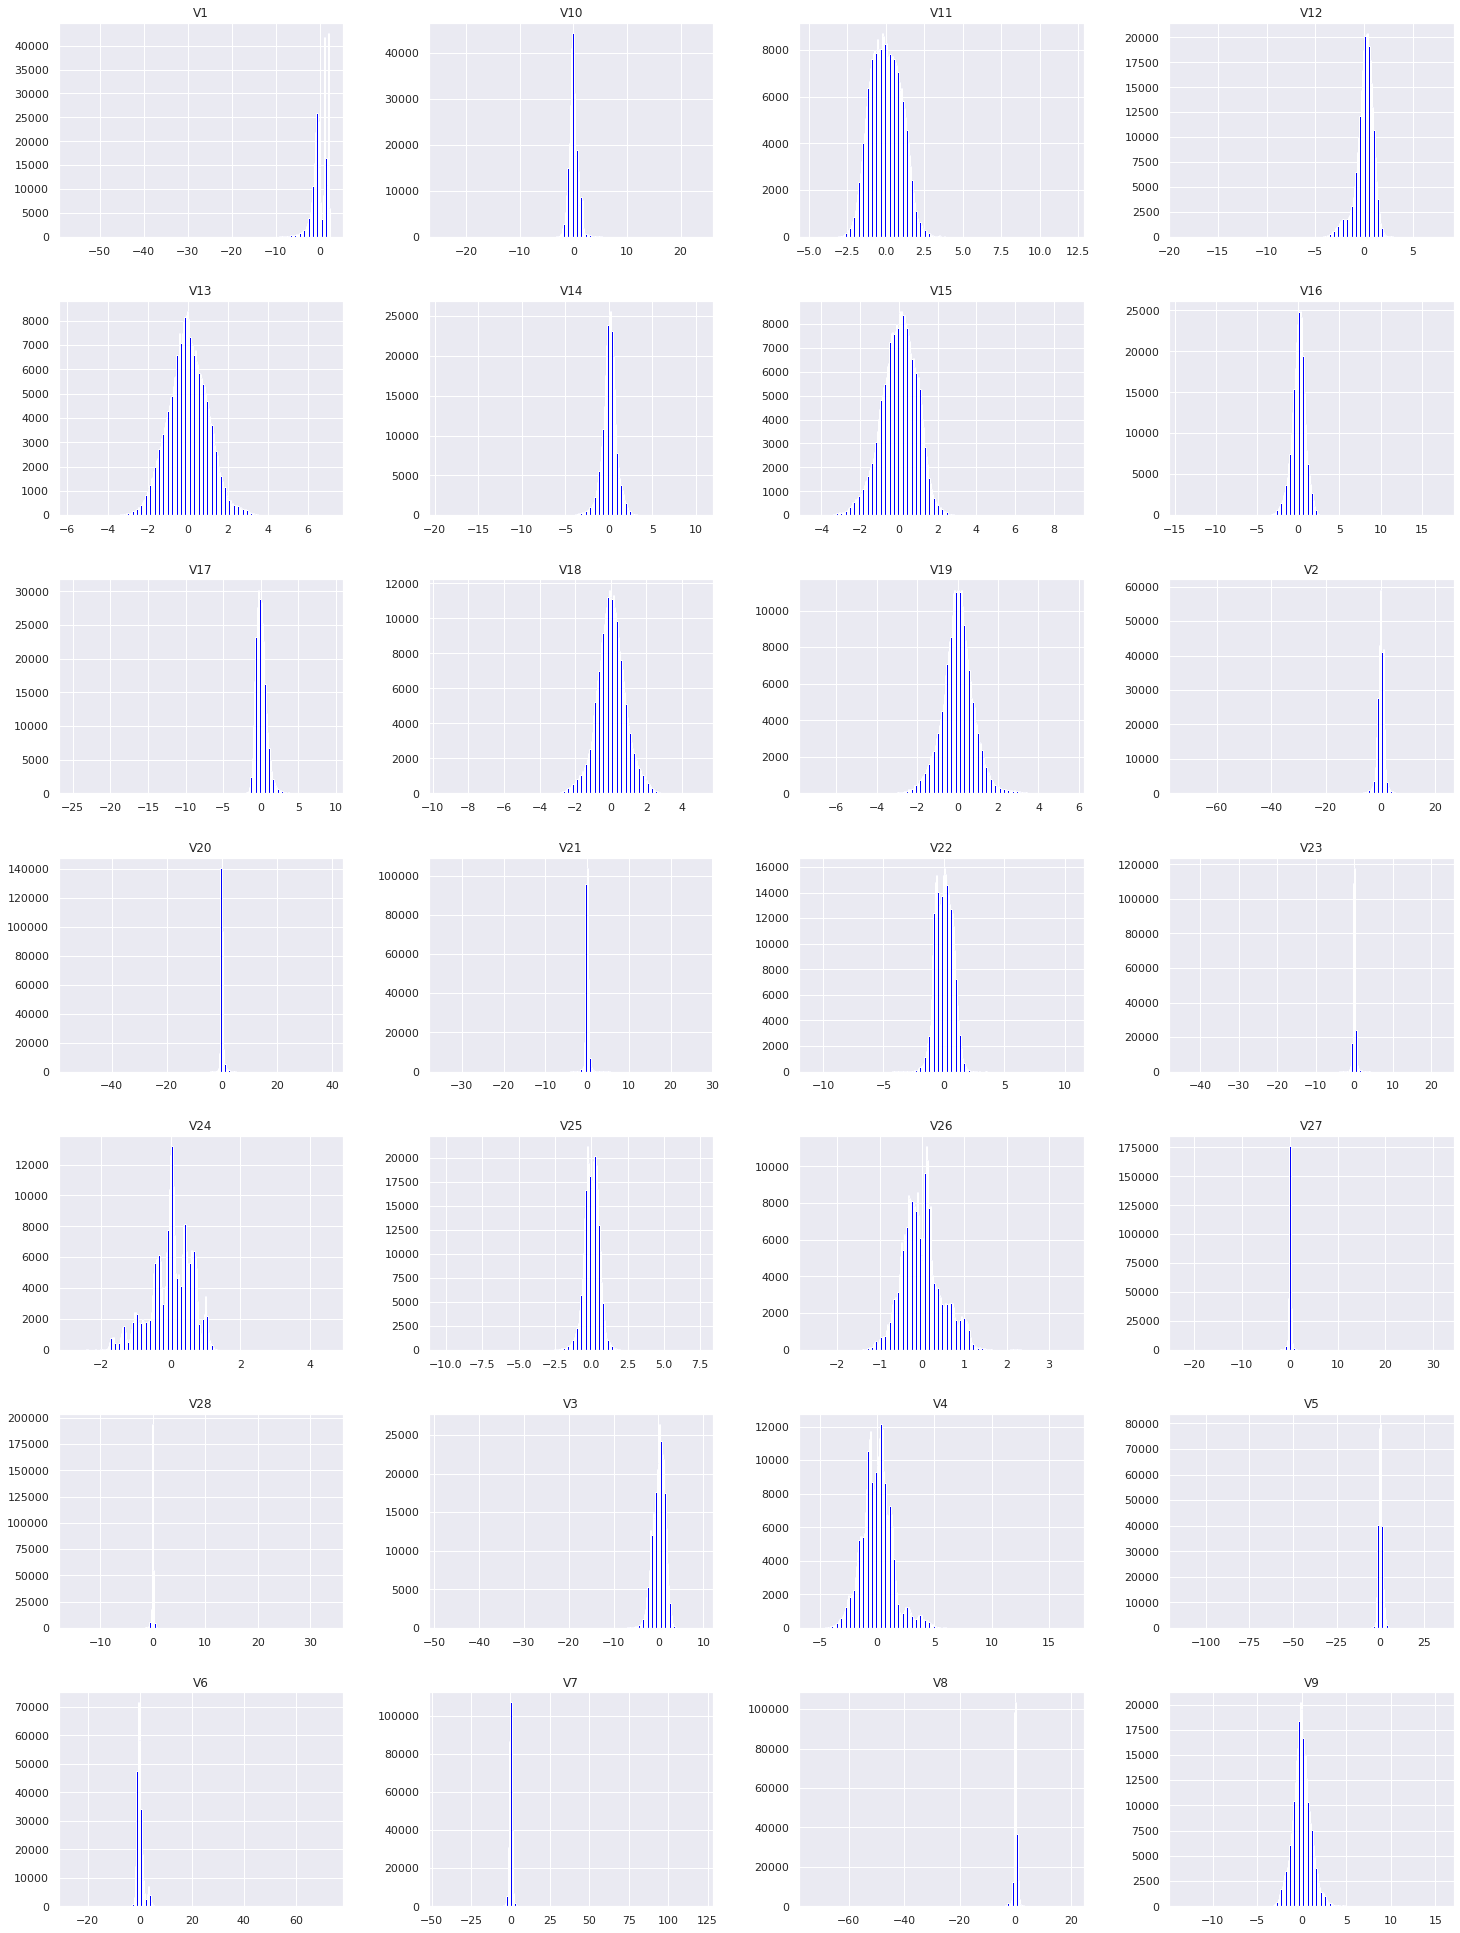

In [ ]:
#observe the different feature type present in the data

df.drop(['Class','Amount','Time'],axis=1).hist(bins=200,color='blue',figsize=(25,50),layout=(10,4))
plt.show()

By looking at the distribution of all the features we can see that there are some features whose distributions are skewed to the left, there are some features whose distributions are skewed to the right and there are some features which appears to have a normal gaussian distribution. Almost all the features have their distributions mean at 0. Some features like V11, V15, V13, V18, V19 has a wider spread compared to other features. Some features like V6, V7, V8 and V28 have a very low spread as compared to other features.

Here we will observe the distribution of our classes

## Transactions in time

In [ ]:
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

Fraudulent transactions have a distribution more even than valid transactions - are equaly distributed in time, including the low real transaction times, during night in Europe timezone.

## Transactions amount

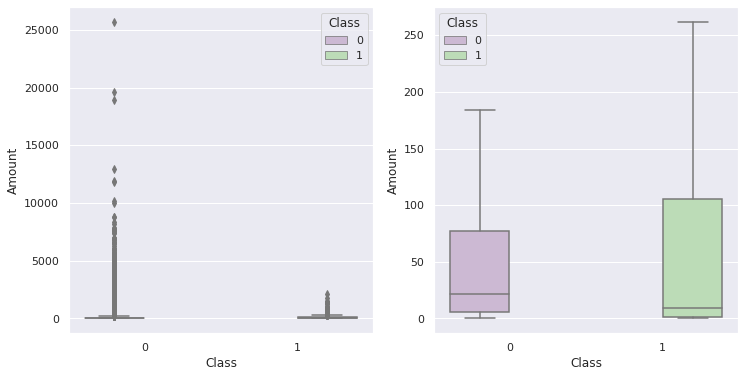

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

In [ ]:
tmp = df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.

Let's plot the fraudulent transactions (amount) against time. The time is shown is seconds from the start of the time period (totaly 48h, over 2 days).

In [ ]:
fraud = df.loc[df['Class'] == 1]

trace = go.Scatter(
    x = fraud['Time'],y = fraud['Amount'],
    name="Amount",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['Amount'],
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Amount of fraudulent transactions',
          xaxis = dict(title = 'Time [s]', showticklabels=True), 
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='fraud-amount')

## Features correlation

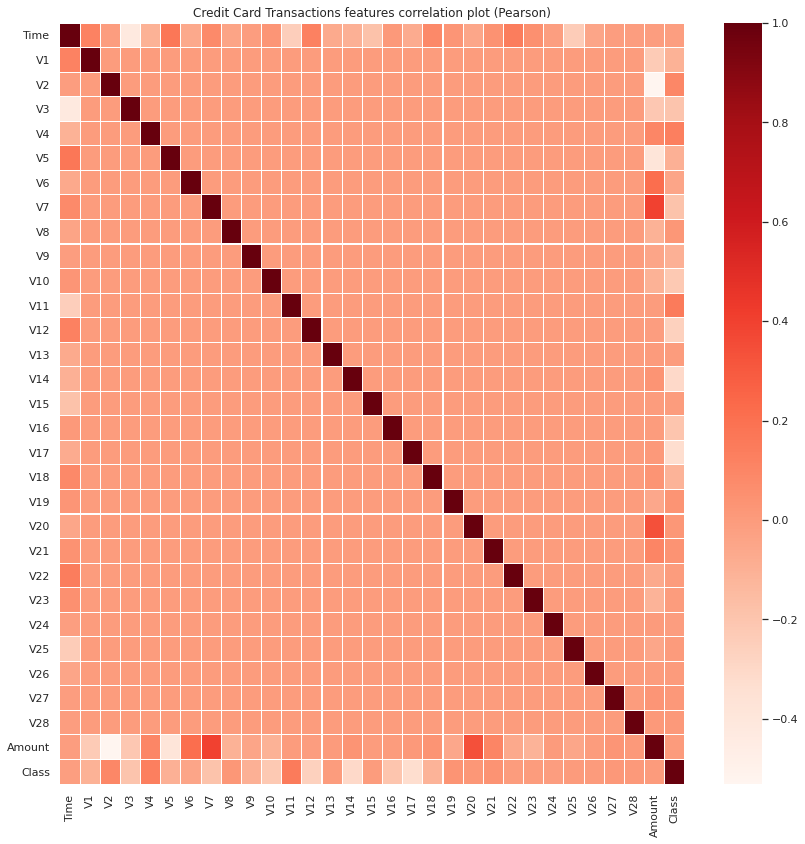

In [ ]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

As expected, there is no notable correlation between features **V1**-**V28**. There are certain correlations between some of these features and **Time** (inverse correlation with **V3**) and **Amount** (direct correlation with **V7** and **V20**, inverse correlation with **V1** and **V5**).


Let's plot the correlated and inverse correlated values on the same graph.

Let's start with the direct correlated values: {V20;Amount} and {V7;Amount}.

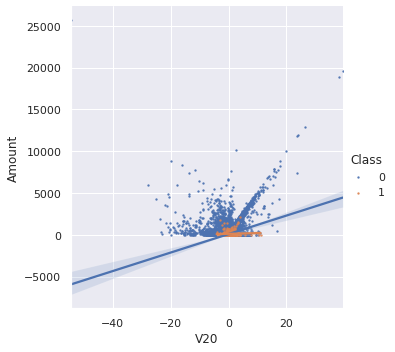

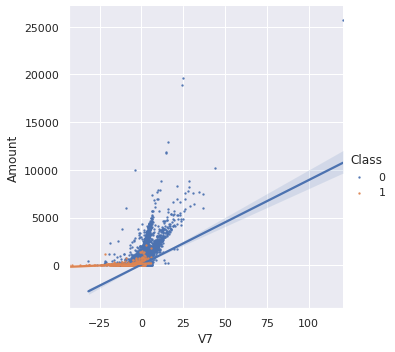

In [ ]:
s = sns.lmplot(x='V20', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

We can confirm that the two couples of features are correlated (the regression lines for **Class = 0** have a positive slope, whilst the regression line for **Class = 1** have a smaller positive slope).

Let's plot now the inverse correlated values.

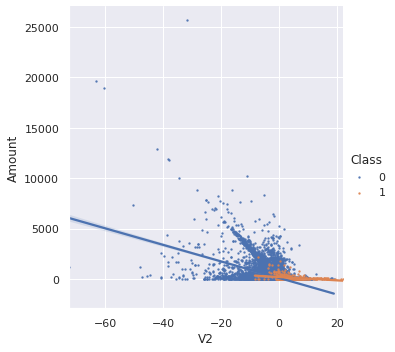

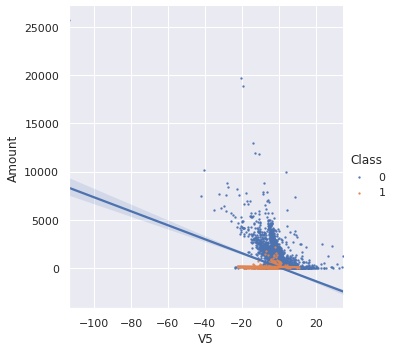

In [ ]:
s = sns.lmplot(x='V2', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

We can confirm that the two couples of features are inverse correlated (the regression lines for **Class = 0** have a negative slope while the regression lines for **Class = 1** have a very small negative slope).

## Features density plot

<Figure size 432x288 with 0 Axes>

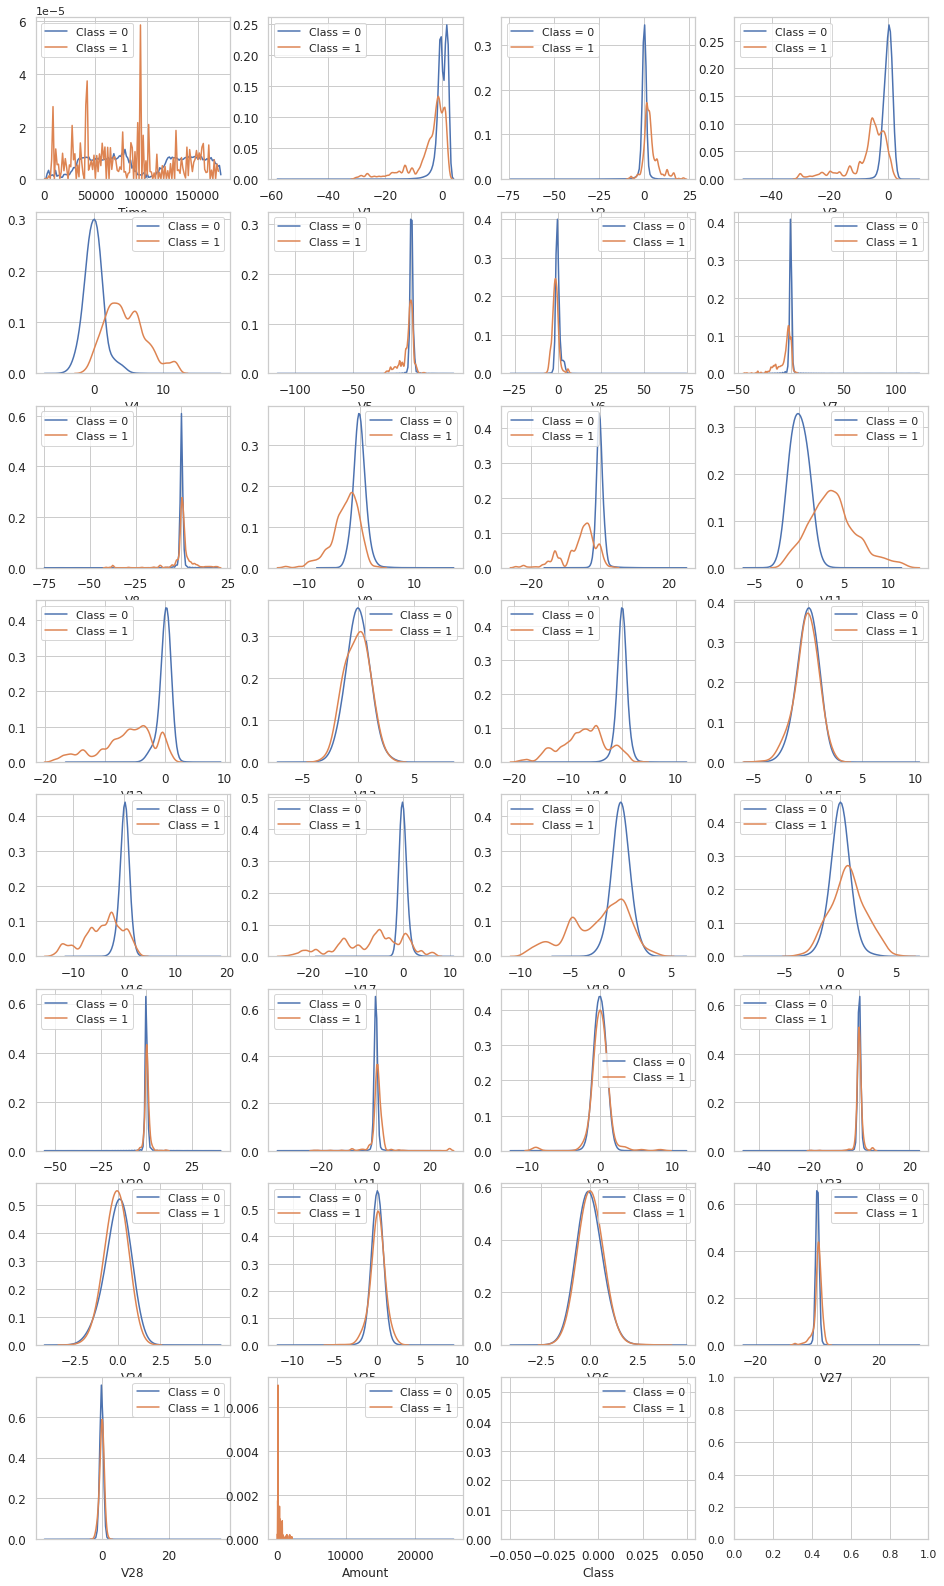

In [ ]:
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

For some of the features we can observe a good selectivity in terms of distribution for the two values of **Class**: **V4**, **V11** have clearly separated distributions for **Class** values 0 and 1, **V12**, **V14**, **V18** are partially separated, **V1**, **V2**, **V3**, **V10** have a quite distinct profile, whilst **V25**, **V26**, **V28** have similar profiles for the two values of **Class**.  

In general, with just few exceptions (**Time** and **Amount**), the features distribution for legitimate transactions (values of **Class = 0**)  is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of **Class = 1**) have a skewed (asymmetric) distribution.

# Predictive models

### Defining predictors and target values


In [ ]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

### Splitting the data into train & test data
Let's define train, validation and test sets.

In [ ]:
train_df, test_df = train_test_split(df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

# Mchine Learning Models for imbalanced dataset

## 1. RandomForestClassifier


### Define model parameters

Let's set the parameters for the model.

Let's run a model using the training set for training. Then, we will use the validation set for validation. 

We will use as validation criterion **GINI**, which formula is **GINI = 2 * (AUC) - 1**, where **AUC** is the **Receiver Operating Characteristic - Area Under Curve (ROC-AUC)** .  Number of estimators is set to **100** and number of parallel jobs is set to **4**.

We start by initializing the RandomForestClassifier.

In [ ]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

Let's train the **RandonForestClassifier** using the **train_df** data and **fit** function.

In [ ]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=2018, verbose=False,
                       warm_start=False)

Let's now predict the **target** values for the **valid_df** data, using **predict** function.

In [ ]:
preds = clf.predict(valid_df[predictors])

Let's also visualize the features importance.

### Features importance

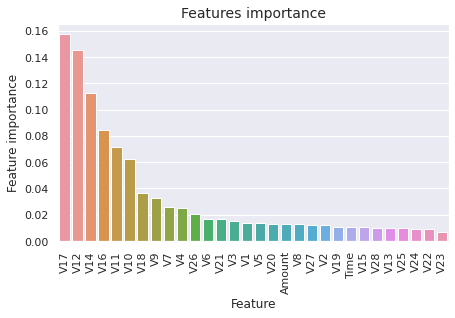

In [ ]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

The most important features are **V17**, **V12**, **V14**, **V10**, **V11**, **V16**.


### Confusion matrix

Let's show a confusion matrix for the results we obtained. 

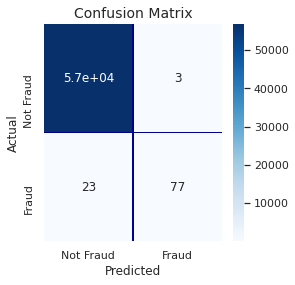

In [ ]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(4,4))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Let's calculate the ROC-AUC score.

### Area under curve

In [ ]:
roc_auc_score(valid_df[target].values, preds)

0.8849736203439907

The **ROC-AUC** score obtained with **RandomForrestClassifier** is **0.88**.

## 2. XGBoost

XGBoost is a gradient boosting algorithm.

Let's prepare the model.

### Prepare the model

We initialize the DMatrix objects for training and validation, starting from the datasets. We also set some of the parameters used for the model tuning.

In [ ]:
# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

### Train the model

Let's train the model. 

In [ ]:
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[0]	train-auc:0.881225	valid-auc:0.864826
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[50]	train-auc:0.92326	valid-auc:0.919725
[100]	train-auc:0.953581	valid-auc:0.935298
[150]	train-auc:0.976631	valid-auc:0.949295
[200]	train-auc:0.989222	valid-auc:0.970433
[250]	train-auc:0.992337	valid-auc:0.972405
[300]	train-auc:0.994251	valid-auc:0.975508
[350]	train-auc:0.995405	valid-auc:0.97605
[400]	train-auc:0.996223	valid-auc:0.977482
[450]	train-auc:0.996969	valid-auc:0.978721
Stopping. Best iteration:
[431]	train-auc:0.996697	valid-auc:0.979704



The best validation score (ROC-AUC) was **0.979**

.


### Plot variable importance

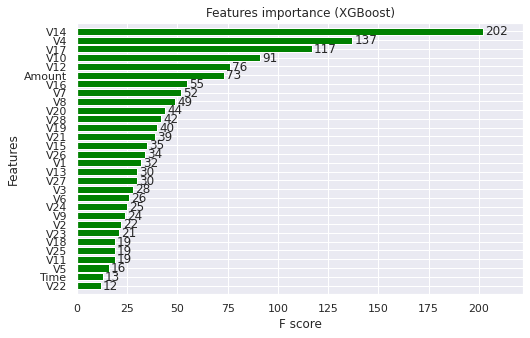

In [ ]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

### Predict test set


We used the train and validation sets for training and validation. We will use the trained model now to predict the target value for the test set.

In [ ]:
preds = model.predict(dtest)

### Area under curve

Let's calculate ROC-AUC.

In [ ]:
roc_auc_score(test_df[target].values, preds)

0.9785387429214589

The AUC score for the prediction of fresh data (test set) is **0.978**.

## 3. AdaBoostClassifier


AdaBoostClassifier stands for Adaptive Boosting Classifier .

### Prepare the model

Let's set the parameters for the model and initialize the model.

In [ ]:
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)

### Fit the model

Let's fit the model.

In [ ]:
clf.fit(train_df[predictors], train_df[target].values)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.8,
                   n_estimators=100, random_state=2018)

### Predict the target values

Let's now predict the **target** values for the **valid_df** data, using predict function.

In [ ]:
preds = clf.predict(valid_df[predictors])

### Features importance

Let's see also the features importance.

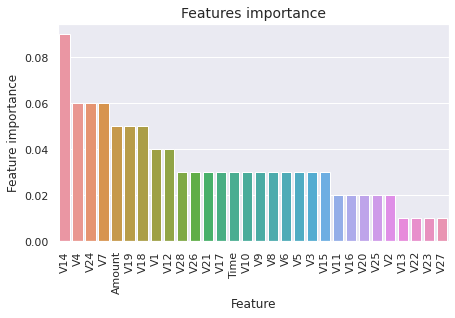

In [ ]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

### Confusion matrix

Let's visualize the confusion matrix.

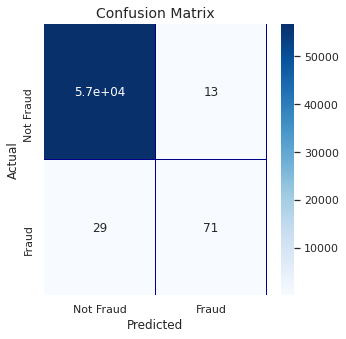

In [ ]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Let's calculate also the ROC-AUC.


### Area under curve

In [ ]:
roc_auc_score(valid_df[target].values, preds)

0.8548856881572932

The ROC-AUC score obtained with AdaBoostClassifier is **0.85**.

## 4. CatBoostClassifier


CatBoostClassifier is a gradient boosting for decision trees algorithm with support for handling categorical data.

### Prepare the model

Let's set the parameters for the model and initialize the model.

In [ ]:
clf = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = RANDOM_STATE,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = VERBOSE_EVAL,
                             od_wait=100)

In [ ]:
clf.fit(train_df[predictors], train_df[target].values,verbose=True)

0:	total: 625ms	remaining: 5m 11s
50:	total: 25.8s	remaining: 3m 47s
100:	total: 51s	remaining: 3m 21s
150:	total: 1m 16s	remaining: 2m 56s
200:	total: 1m 41s	remaining: 2m 31s
250:	total: 2m 6s	remaining: 2m 5s
300:	total: 2m 31s	remaining: 1m 40s
350:	total: 2m 56s	remaining: 1m 14s
400:	total: 3m 20s	remaining: 49.5s
450:	total: 3m 44s	remaining: 24.4s
499:	total: 4m 8s	remaining: 0us


### Predict the target values

Let's now predict the **target** values for the **val_df** data, using predict function.

In [ ]:
preds = clf.predict(valid_df[predictors])

### Features importance

Let's see also the features importance.

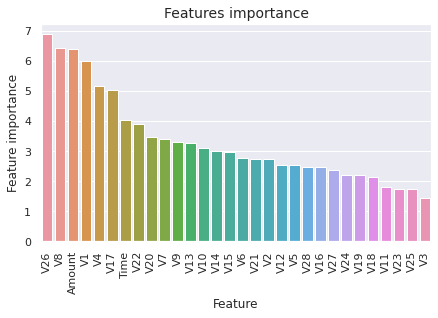

In [ ]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

### Confusion matrix

Let's visualize the confusion matrix.

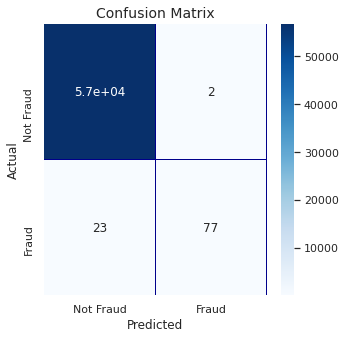

In [ ]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Let's calculate also the ROC-AUC.


### Area under curve

In [ ]:
roc_auc_score(valid_df[target].values, preds)

0.8849824135626606

The ROC-AUC score obtained with CatBoostClassifier is **0.88**.

## 5. LightGBM


Let's continue with another gradient boosting algorithm, LightGBM.


### Define model parameters

Let's set the parameters for the model. We will use these parameters only for the first lgb model.

In [ ]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':150, # because training data is extremely unbalanced 
         }

### Prepare the model

Let's prepare the model, creating the **Dataset**s data structures from the train and validation sets.

In [ ]:
dtrain = lgb.Dataset(train_df[predictors].values, 
                     label=train_df[target].values,
                     feature_name=predictors)

dvalid = lgb.Dataset(valid_df[predictors].values,
                     label=valid_df[target].values,
                     feature_name=predictors)

### Run the model

Let's run the model, using the **train** function.

In [ ]:
evals_results = {}

model = lgb.train(params, 
                  dtrain, 
                  valid_sets=[dtrain, dvalid], 
                  valid_names=['train','valid'], 
                  evals_result=evals_results, 
                  num_boost_round=MAX_ROUNDS,
                  early_stopping_rounds=2*EARLY_STOP,
                  verbose_eval=VERBOSE_EVAL, 
                  feval=None)


Training until validation scores don't improve for 100 rounds.
[50]	train's auc: 0.870175	valid's auc: 0.862687
[100]	train's auc: 0.961406	valid's auc: 0.915406
[150]	train's auc: 0.97667	valid's auc: 0.918937
[200]	train's auc: 0.982815	valid's auc: 0.926263
[250]	train's auc: 0.979483	valid's auc: 0.907221
[300]	train's auc: 0.979427	valid's auc: 0.896139
Early stopping, best iteration is:
[236]	train's auc: 0.984078	valid's auc: 0.934836


Best validation score  was obtained for round **85**, for which **AUC ~= 0.93**.

Let's plot variable importance.

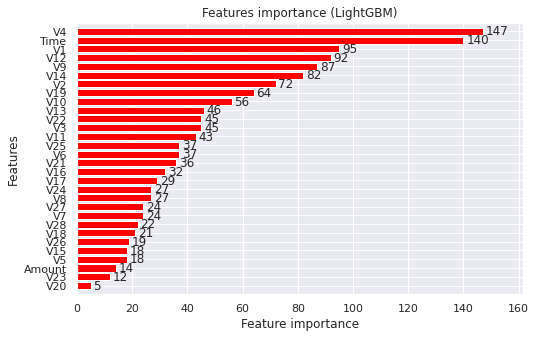

In [ ]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
lgb.plot_importance(model, height=0.8, title="Features importance (LightGBM)", ax=ax,color="red") 
plt.show()

Let's predict now the target for the test data.

### Predict test data

In [ ]:
preds = model.predict(test_df[predictors])

### Area under curve

Let's calculate the ROC-AUC score for the prediction.

In [ ]:
roc_auc_score(test_df[target].values, preds)

0.9323229925081777

The ROC-AUC score obtained for the test set is **0.937**.

### Standardization of Variables

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Colum standardize the time and amount column
from sklearn.preprocessing import StandardScaler
df["Norm_Time"]=StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))
df["Norm_Amount"]=StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df=df.drop(["Amount","Time"], axis=1)

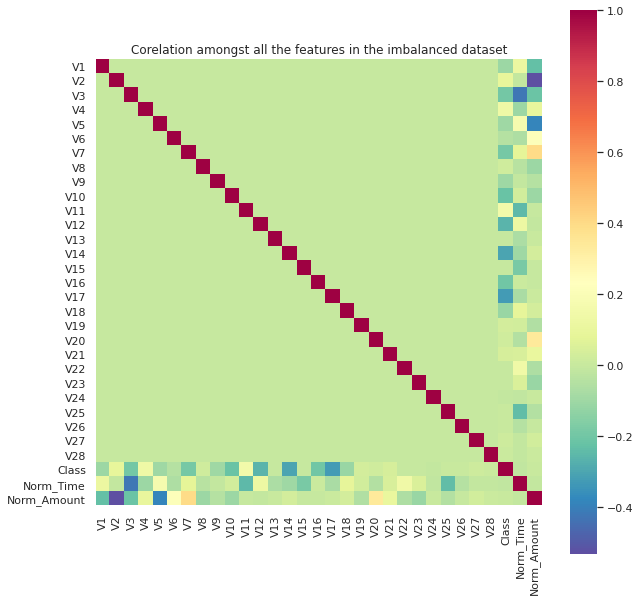

In [ ]:
#Get Corelation Matrix between all the features present in the data
cor_matr = df.corr()
plt.figure(figsize=(10,10))
sn.heatmap(cor_matr,square='True',cmap='Spectral_r')
plt.title('Corelation amongst all the features in the imbalanced dataset')
plt.show()

### Under-sample the dataset to balance the classes

Since the dataset is highly imbalanced there are broadly two strategies we will follow to correctly sample our dataset - under-sampling the dataset and over-sampling the dataset.

In this section we will use a data under-sampling technique where we will sample the data based on the number of instances we have in our minority class. In order to create the final dataset, we will take equal number of sample from both the classes, concatenate them into a single dataset and perform random shuffling to shuffle the data. The resultant dataset will contain 50% points from each of the classes.

Under-sampling helps us get rid of the problem of data imbalanced, but at the same time we are discarding huge amount of data to build our models. We can negate this by using certain data over sampling strategies. In a later section, we will implement something called SMOTE algorithm - a technique used to oversample an imbalanced dataset by adding synthetic points. We will discuss about SMOTE when we implement it.

In [ ]:
state=48

In [ ]:
#Number of data_fraudulent transaction in the whole data
data_fraud=df[df['Class']==1]
data_valid=df[df['Class']==0].sample(data_fraud.shape[0],random_state=state)
data_under=pd.concat([data_fraud,data_valid])

#We will shuffle our dataset after concatenating
data_under = data_under.sample(frac=1).reset_index(drop=True)
data_under.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Norm_Time,Norm_Amount
0,-1.410852,2.268271,-2.297554,1.871331,0.248957,-1.208799,-1.358648,1.102916,-1.317364,-4.626919,3.357640,-2.998815,-1.956786,-6.766633,-0.869900,-0.868577,-0.370333,0.419266,-0.894894,0.058063,0.155381,-0.614880,-0.196126,-0.464376,0.118473,-0.484537,0.373596,0.187657,1,-0.371290,-0.349231
1,-0.875575,0.989236,0.983694,-1.308730,0.177289,0.417612,-0.008157,0.743777,-0.017707,-0.983795,0.289975,1.035639,0.531333,0.190757,-0.379196,0.573745,-0.814771,0.443508,0.300715,-0.014245,-0.119175,-0.335169,-0.070446,0.205703,-0.192807,-0.278389,0.235046,0.128942,0,0.689229,-0.350151
2,-17.537592,12.352519,-20.134613,11.122771,-14.571080,-0.381622,-23.928661,-4.724921,-8.603038,-15.231833,4.417055,-12.893520,-0.109628,-3.547230,-2.177824,-10.402068,-18.372019,-8.314092,2.435823,1.925103,-4.352213,2.389041,2.019128,0.627192,-1.085997,-0.071803,-3.838198,-0.802564,1,0.050984,-0.313968
3,-1.366386,0.507308,2.429962,2.610246,1.149036,1.010367,-0.324502,0.447115,0.242617,0.074774,1.913361,-2.157811,0.758656,1.546749,-1.473855,-0.682040,1.235533,-0.343938,-0.317782,-0.256991,-0.093243,0.167020,-0.404183,-0.310599,0.195456,0.210615,0.036645,0.006882,0,-1.494162,-0.322844
4,-2.921944,-0.228062,-5.877289,2.201884,-1.935440,0.631141,-1.245106,1.511348,-1.899987,-6.428231,4.229154,-5.292314,-0.888087,-7.672250,0.547571,-4.307060,-5.701174,-1.772803,-0.193132,2.230735,1.441622,0.895528,1.385511,-2.028024,0.509131,0.172643,0.726781,0.234514,1,0.950494,2.538227


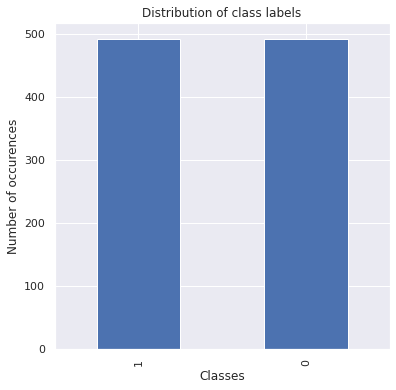

In [ ]:
#Check the class distribution in the given data
data_under['Class'].value_counts().plot(figsize=(6,6),kind='bar')
plt.title("Distribution of class labels")
plt.xlabel("Classes")
plt.ylabel("Number of occurences")
plt.show()

As we can see, the distribution of class labels is almost equal after we have under-sampled the dataset. This under-sampled dataset now contains 50% class labels from the fraudulent class and 50% class labels from the non fraudulent class.

In [ ]:
#Get percentage fradulent information in the balanced dataset
not_fraud=data_under[data_under['Class']==0].shape[0]
fraud=data_under[data_under['Class']==1].shape[0]
total=fraud+not_fraud

print("Percentage of Fradulent transaction: {}".format(np.round(100*fraud/total,4)))
print("Percentage of Non Fradulent transaction: {}".format(np.round(100*not_fraud/total,4)))

Percentage of Fradulent transaction: 50.0
Percentage of Non Fradulent transaction: 50.0


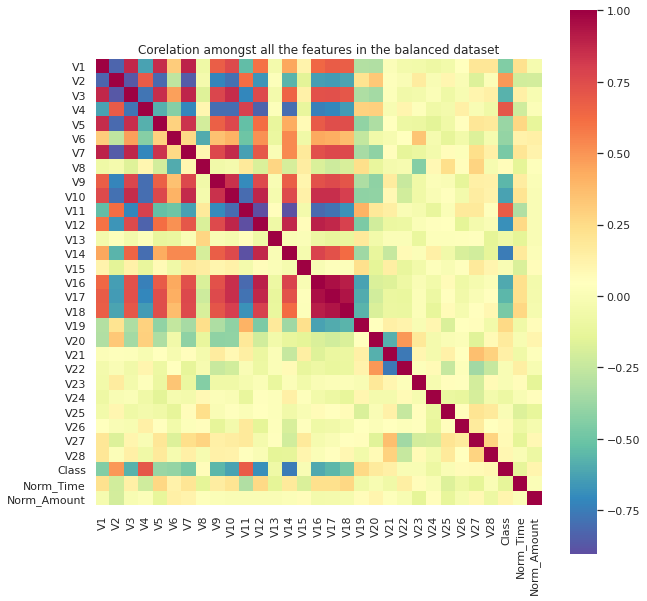

In [ ]:
#Get Corelation Matrix between all the features present in the under sampled data

cor_matr = data_under.corr()
plt.figure(figsize=(10,10))
sn.heatmap(cor_matr,square='True',cmap='Spectral_r')
plt.title('Corelation amongst all the features in the balanced dataset')
plt.show()

In the corelation heatmap above, we can see that there are some features like V2, V4, V11, V19 which has a strong positive corelation to the class label. This means as the value of these features increases, there is a higher chance that a transaction will be fraudulent one.

The features V3, V10, V12, V14 and V16 seems to have a higher negative corelation to the class labels. This means as these value decreases there is a higher chance that a transaction will be a fraudulent one. 

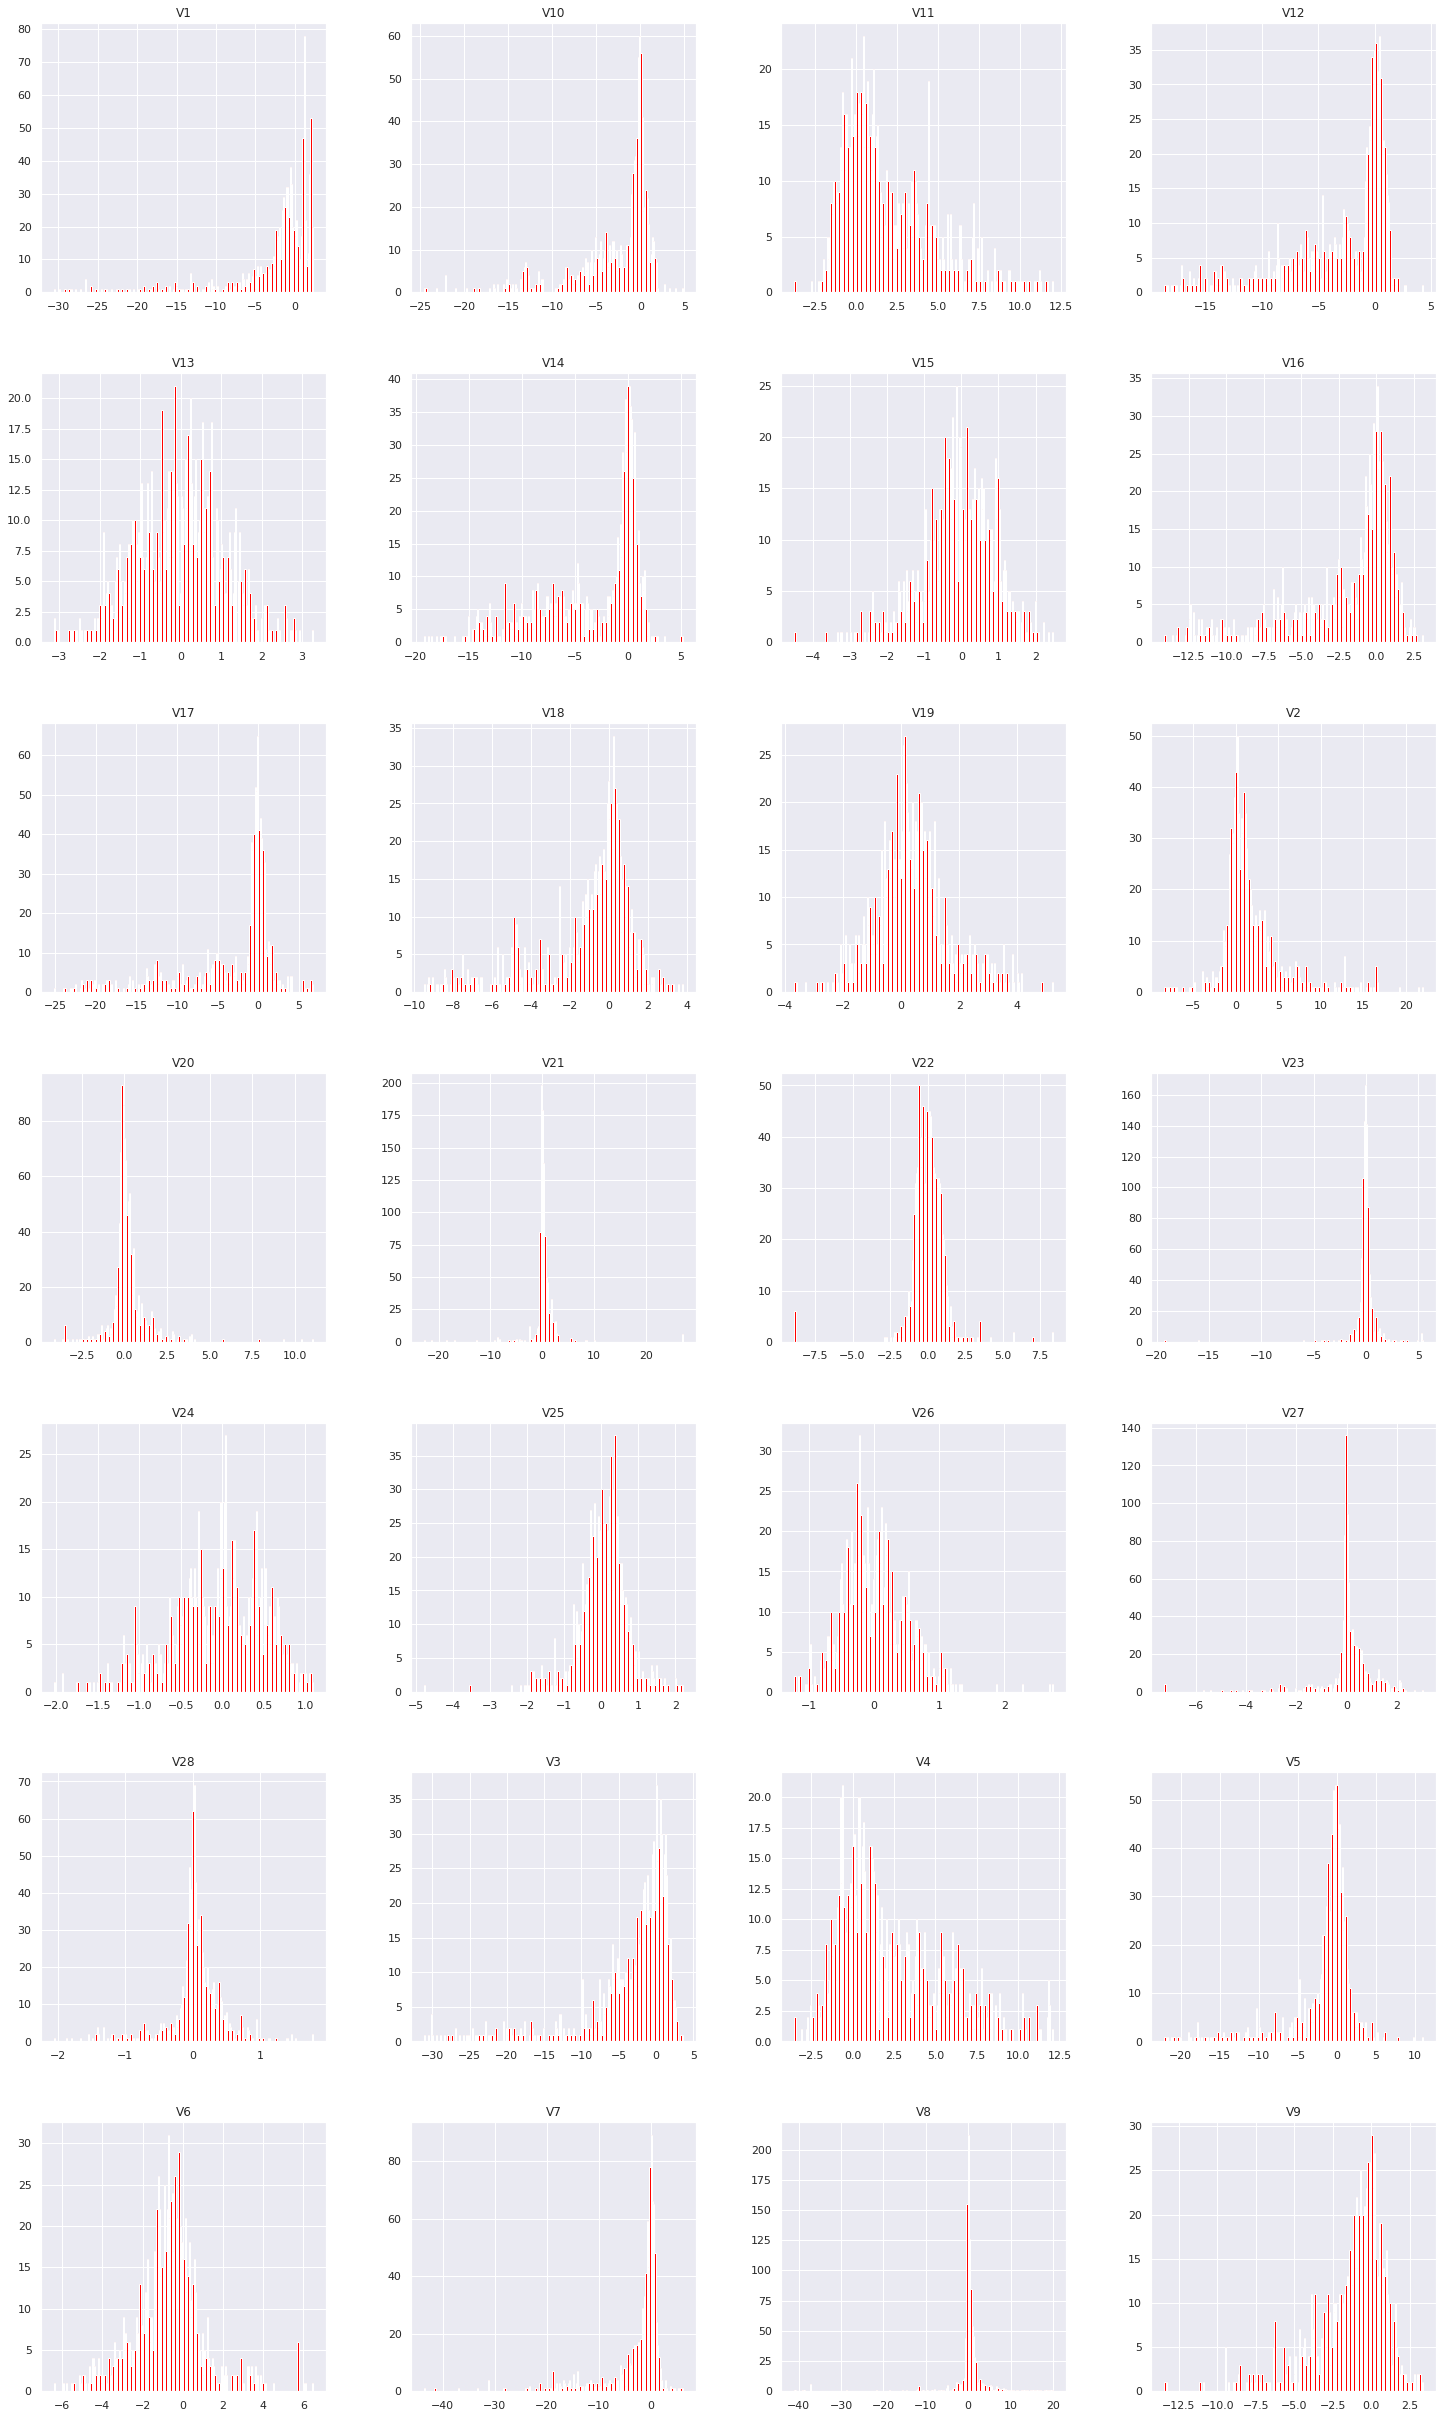

In [ ]:
#Check the distribution of all the independent variables for the under sampled dataset
data_under.drop(['Class','Norm_Amount','Norm_Time'],axis=1).hist(bins=200,color='red',figsize=(25,50),layout=(8,4))
plt.show()

In [ ]:
features=[i for i in data_under.drop(['Class','Norm_Amount','Norm_Time'],axis=1).columns]
len(features)

28

### Box Plots

What is a box-plot and why is it useful?

Box plot is a very powerful statistical tool which can be used to represent statistical information like median, quantiles and inter-quartile range in a single plot.

<Figure size 1008x576 with 0 Axes>

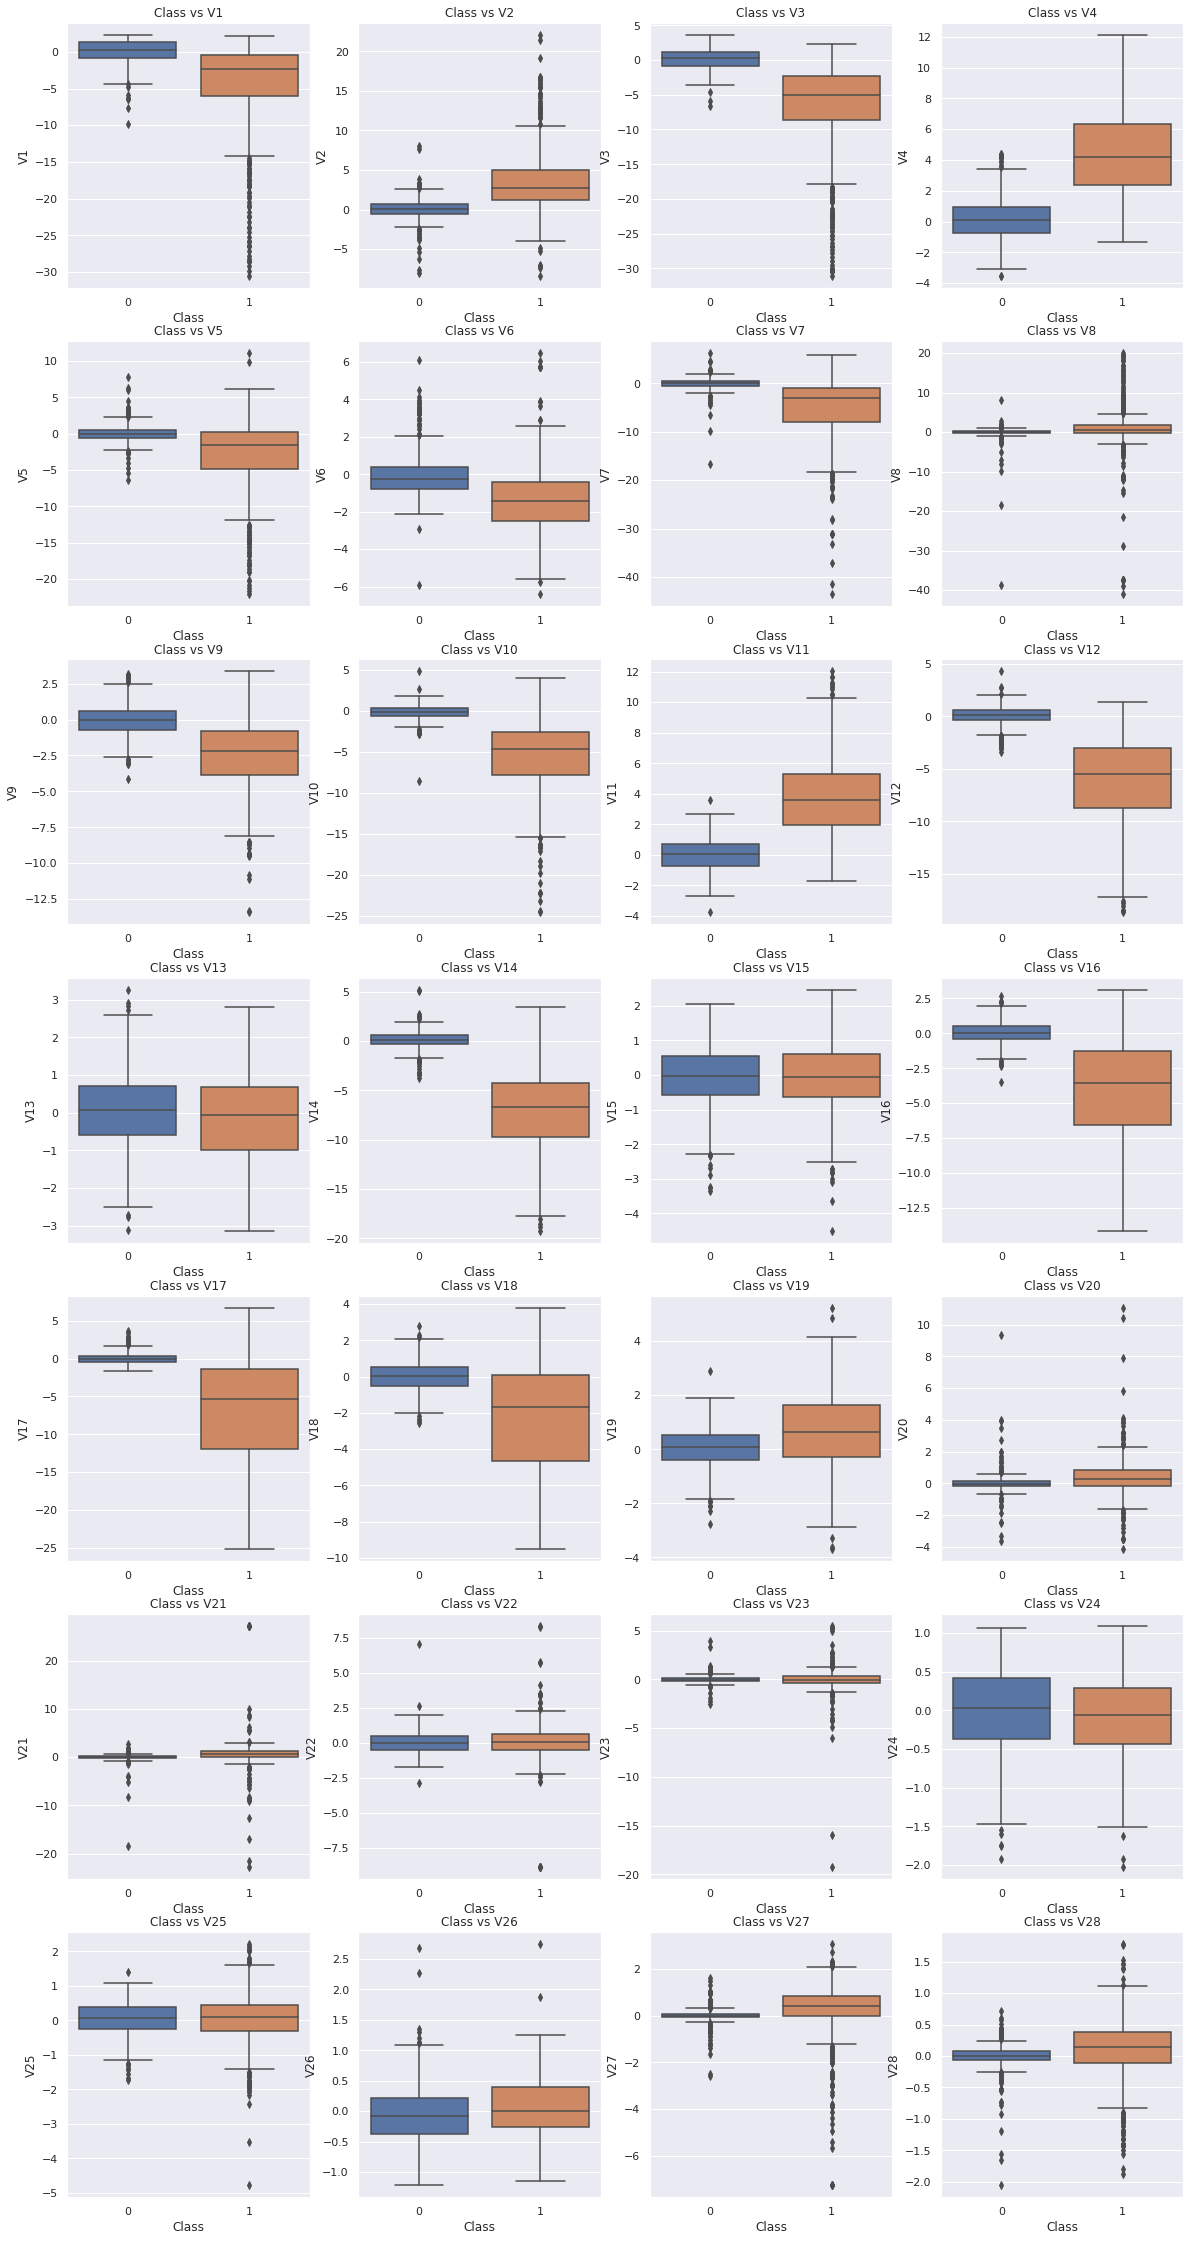

In [ ]:
#Draw box plots of all the features
plt.figure(figsize=(14, 8))

fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(20,40))

i_ax=0
for i in range(len(features[0:4])):
    sn.boxplot(x="Class", y=features[i], data=data_under, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[i]))
    
i_ax=1
for i in range(len(features[4:8])):
    sn.boxplot(x="Class", y=features[4+i], data=data_under, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[4+i]))
    
i_ax=2
for i in range(len(features[8:12])):
    sn.boxplot(x="Class", y=features[8+i], data=data_under, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[8+i]))
    
i_ax=3
for i in range(len(features[12:16])):
    sn.boxplot(x="Class", y=features[12+i], data=data_under, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[12+i]))
    
i_ax=4
for i in range(len(features[16:20])):
    sn.boxplot(x="Class", y=features[16+i], data=data_under, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[16+i]))
    
i_ax=5
for i in range(len(features[20:24])):
    sn.boxplot(x="Class", y=features[20+i], data=data_under, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[20+i]))
    
i_ax=6
for i in range(len(features[24:28])):
    sn.boxplot(x="Class", y=features[24+i], data=data_under, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[24+i]))
    
i_ax=7
for i in range(len(features[28:32])):
    sn.boxplot(x="Class", y=features[28+i], data=data_under, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[28+i]))
    
plt.show()

### PDF Distribution

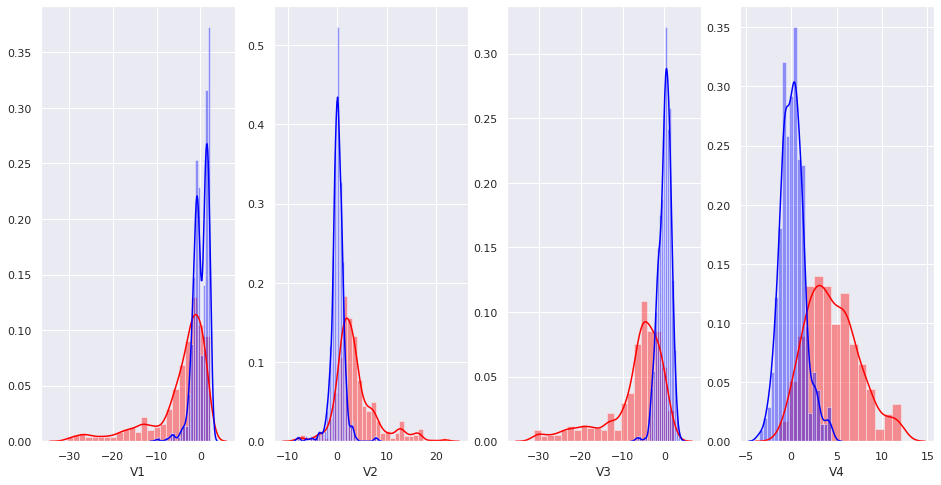

In [ ]:
plt.figure(figsize=(16, 8))

plt.subplot(1,4,1)
sn.distplot(data_under[data_under['Class'] == 1]['V1'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V1'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,2)
sn.distplot(data_under[data_under['Class'] == 1]['V2'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V2'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,3)
sn.distplot(data_under[data_under['Class'] == 1]['V3'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V3'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,4)
sn.distplot(data_under[data_under['Class'] == 1]['V4'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V4'][0:] , label = "0" , color = 'blue' )

plt.show()

Here we can see that for features V1, V2, V3 and V4 the class distributions are partially separable. All the distributions are highly skewed. For V4, there is more partial separatability as compared to the other features. 

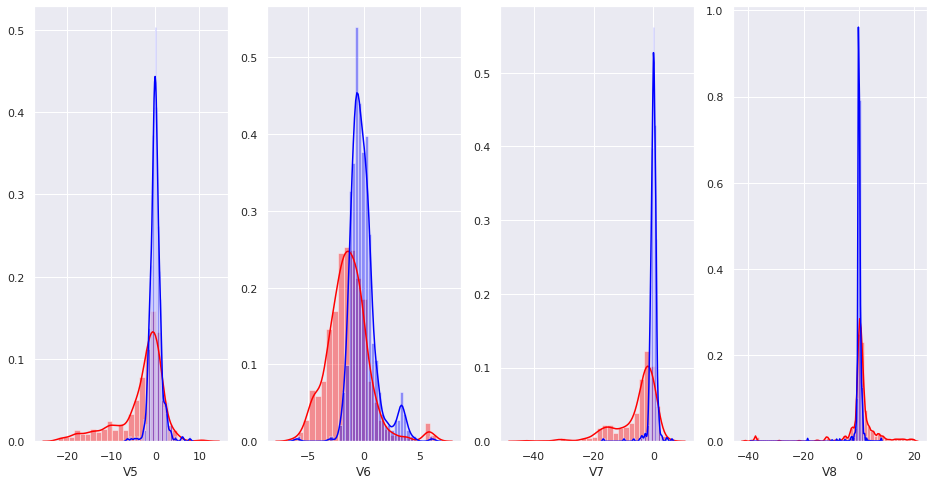

In [ ]:
plt.figure(figsize=(16, 8))

plt.subplot(1,4,1)
sn.distplot(data_under[data_under['Class'] == 1]['V5'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V5'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,2)
sn.distplot(data_under[data_under['Class'] == 1]['V6'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V6'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,3)
sn.distplot(data_under[data_under['Class'] == 1]['V7'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V7'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,4)
sn.distplot(data_under[data_under['Class'] == 1]['V8'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V8'][0:] , label = "0" , color = 'blue' )

plt.show()

For V5 and V6, the class distributions are partially separable. For V7 and V8 the class distributions are almost overlapping and there is no clear way of separating these features based on their class labels.

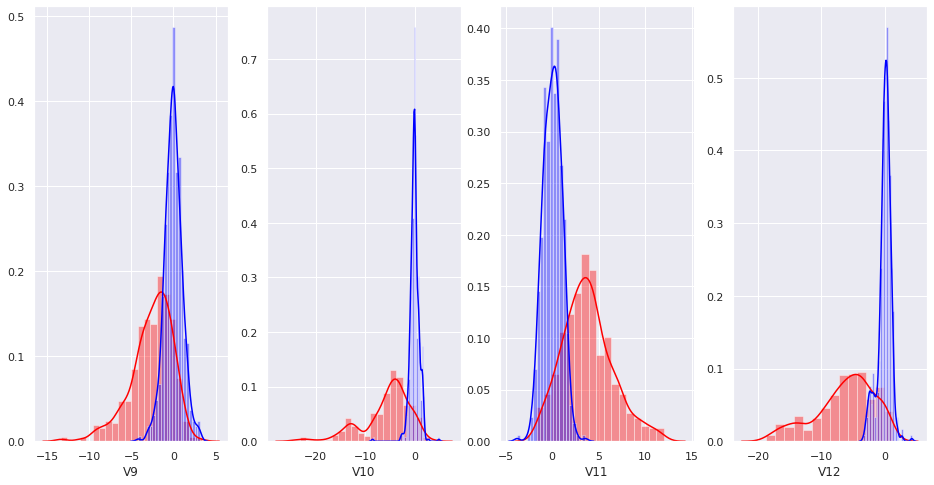

In [ ]:
plt.figure(figsize=(16, 8))

plt.subplot(1,4,1)
sn.distplot(data_under[data_under['Class'] == 1]['V9'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V9'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,2)
sn.distplot(data_under[data_under['Class'] == 1]['V10'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V10'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,3)
sn.distplot(data_under[data_under['Class'] == 1]['V11'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V11'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,4)
sn.distplot(data_under[data_under['Class'] == 1]['V12'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V12'][0:] , label = "0" , color = 'blue' )

plt.show()

Here again, we see a lot of partial separability between the class labels for all four of these features.

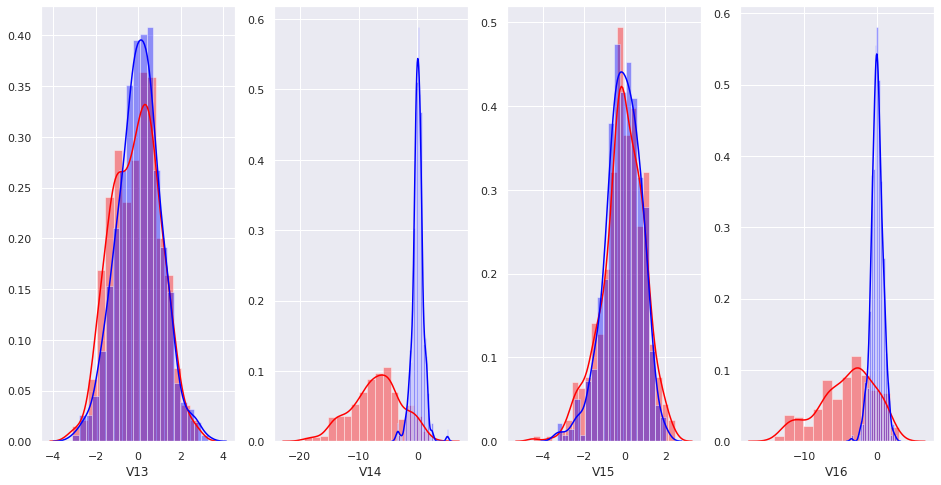

In [ ]:
plt.figure(figsize=(16, 8))

plt.subplot(1,4,1)
sn.distplot(data_under[data_under['Class'] == 1]['V13'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V13'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,2)
sn.distplot(data_under[data_under['Class'] == 1]['V14'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V14'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,3)
sn.distplot(data_under[data_under['Class'] == 1]['V15'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V15'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,4)
sn.distplot(data_under[data_under['Class'] == 1]['V16'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V16'][0:] , label = "0" , color = 'blue' )

plt.show()

V13, V15 features are highly overlapping as far as their class label is concerned. V14 and V16 features has some partial separability as far as their class label is concerned.

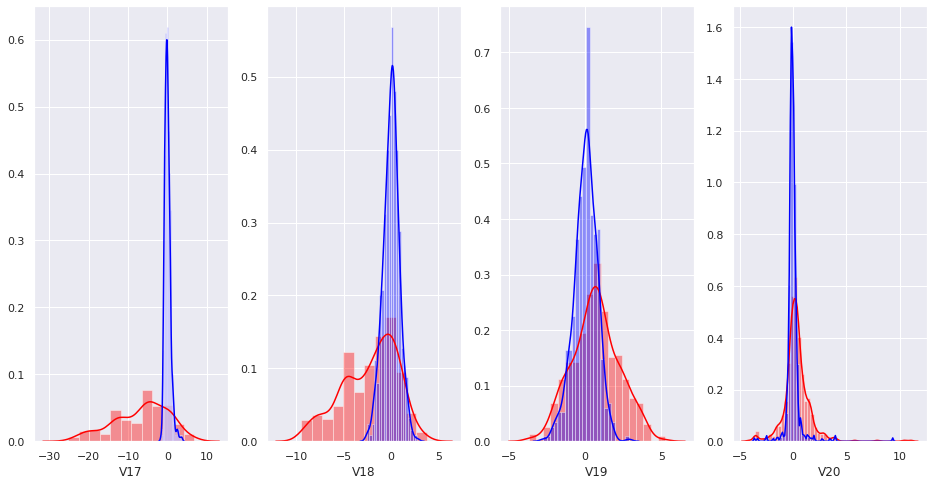

In [ ]:
plt.figure(figsize=(16, 8))

plt.subplot(1,4,1)
sn.distplot(data_under[data_under['Class'] == 1]['V17'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V17'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,2)
sn.distplot(data_under[data_under['Class'] == 1]['V18'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V18'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,3)
sn.distplot(data_under[data_under['Class'] == 1]['V19'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V19'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,4)
sn.distplot(data_under[data_under['Class'] == 1]['V20'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V20'][0:] , label = "0" , color = 'blue' )

plt.show()

Here the spread of the fraudulent class is more as compared to the spread in non fraudulent class.

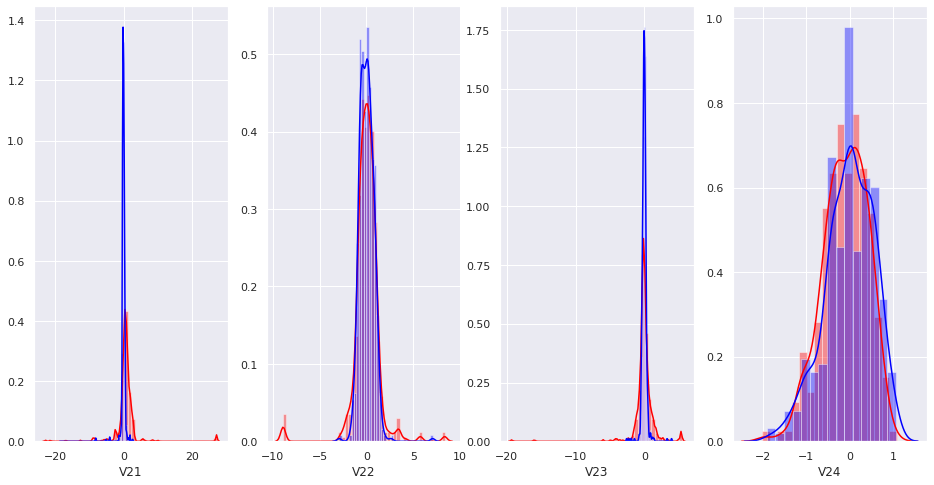

In [ ]:
plt.figure(figsize=(16, 8))

plt.subplot(1,4,1)
sn.distplot(data_under[data_under['Class'] == 1]['V21'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V21'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,2)
sn.distplot(data_under[data_under['Class'] == 1]['V22'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V22'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,3)
sn.distplot(data_under[data_under['Class'] == 1]['V23'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V23'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,4)
sn.distplot(data_under[data_under['Class'] == 1]['V24'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V24'][0:] , label = "0" , color = 'blue' )

plt.show()

The class distribution of these features - V21, V22, V23 and V24 are completely inseparable. The distributions are highly overlapping with no way to separate the class labels.

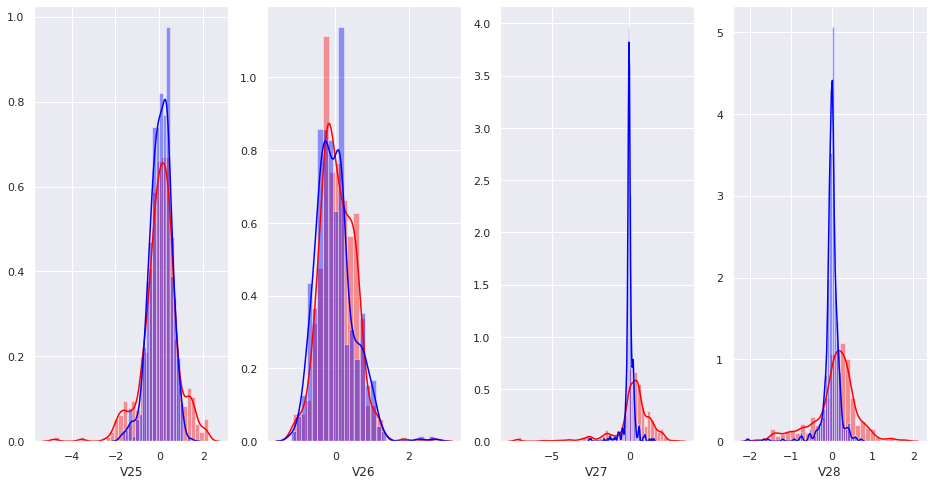

In [ ]:
plt.figure(figsize=(16, 8))

plt.subplot(1,4,1)
sn.distplot(data_under[data_under['Class'] == 1]['V25'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V25'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,2)
sn.distplot(data_under[data_under['Class'] == 1]['V26'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V26'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,3)
sn.distplot(data_under[data_under['Class'] == 1]['V27'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V27'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,4)
sn.distplot(data_under[data_under['Class'] == 1]['V28'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V28'][0:] , label = "0" , color = 'blue' )

plt.show()

Here again we see that these features cannot be separated well based on their class labels. The class distributions are highly overlapping.

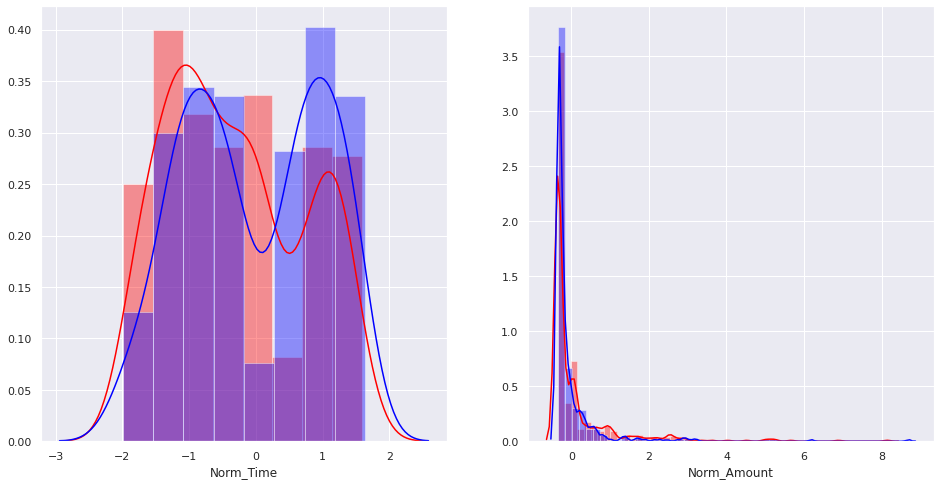

In [ ]:
plt.figure(figsize=(16, 8))

plt.subplot(1,2,1)
sn.distplot(data_under[data_under['Class'] == 1]['Norm_Time'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['Norm_Time'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,2,2)
sn.distplot(data_under[data_under['Class'] == 1]['Norm_Amount'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['Norm_Amount'][0:] , label = "0" , color = 'blue' )


plt.show()

### Splitting the data into train and test datasets

Before building our machine learning models, we will split the dataset in such a way that 80% of the undersample data goes to our training set and 20% data from the undersampled class goes to our test set. We will make use of the 'stratify' argument to make sure we have equal distribution of class labels in both the training as well as test sets. 

After the initial splitting, we have 787 points in our training dataset and 197 points in our test dataset. We will build machine learning models using these 787 points and then evaluate the performance of each of our models on the test set. 

In [ ]:
from sklearn.model_selection import train_test_split

X=data_under.drop("Class", axis=1)
y=data_under['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=state)

print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])

Number of data points in train data: 787
Number of data points in test data: 197


### Check the distribution of train and test data after splitting the original dataset

This is a sanity check we need to perform to check if the distribution of class labels is same in both the training as well as the test set. We can see that in both the train as well as the test sets, the class labels are distributed almost equally at 50% data points from each of the classes.

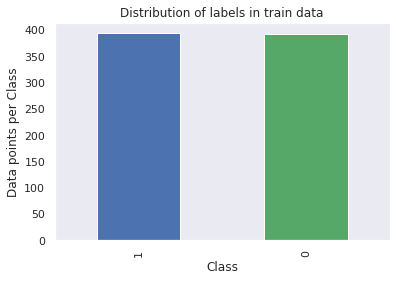

Number of data points in class 1 : 394 ( 50.064 %)
Number of data points in class 2 : 393 ( 49.936 %)
--------------------------------------------------------------------------------


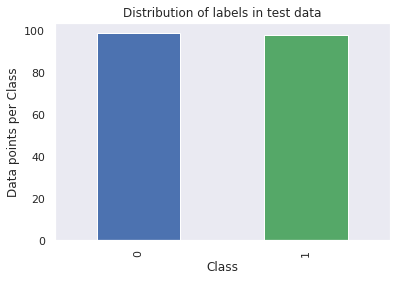

Number of data points in class 1 : 99 ( 50.254 %)
Number of data points in class 2 : 98 ( 49.746 %)


In [ ]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts()
test_class_distribution = y_test.value_counts()

my_colors = ["b","g"]
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of labels in train data')
plt.grid()
plt.show()


sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')
    
print('-'*80)
test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of labels in test data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

### Dimensionality Reduction using PCA

Shape of the Data Matrix before reducing dimension:  (787, 30)
Shape of the Data Matrix after reducing dimension:  (787, 2)


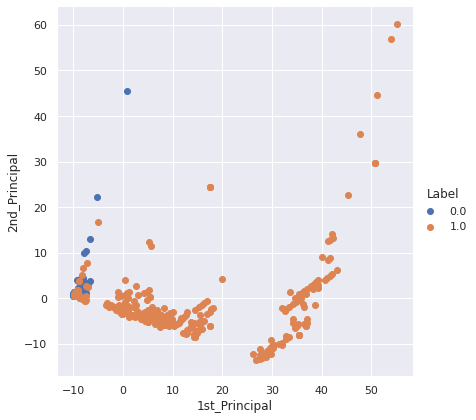

In [ ]:
#Initialize the PCA
from sklearn import decomposition
pca = decomposition.PCA()

#Configure the parameteres: Number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(X_train)

#pca_data will contain the 2-D projections of X_train
print("Shape of the Data Matrix before reducing dimension: ",X_train.shape)
print("Shape of the Data Matrix after reducing dimension: ",pca_data.shape)

#Attaching the label for each 2D data point. 
pca_data = np.vstack((pca_data.T, y_train)).T

#Creating a new dataframe which help us in ploting the result data. The new dataframe contains the reduced dimension of X_train along with the class label.
pca_df = pd.DataFrame(data=pca_data, columns=("1st_Principal", "2nd_Principal", "Label"))
sn.FacetGrid(pca_df, hue="Label", size=6).map(plt.scatter, '1st_Principal', '2nd_Principal').add_legend()
plt.show()

### Functioin to plot Confusion Matrix, Precision Matrix, Recall Matrix

We will use this function to draw the confusion matrix, precision matrix and the recall matrix. We will use the confusion matrix to keep an eye on the false positive values and the recall values. Our main objective of this case study is to build a model which has a high recall value.

Confusion Matrix is a tool which helps us to evaluate the performance of our classification model on unseen data. It's a very important tool to evaluate metrics such as Precision, Recall, Accuracy and Area under the ROC curve using these four values - False Positives (FP), False Negatives (FN), True Positives (TP) and True Negatives (TN).

Let us understand these four metrics in a bit more detail with regards to the given problem. 

True Positives (TP): Here the model has predicted the transaction to be fraudulent and in real life the transaction is fraudulent.

True Negatives (TN): Here the model has predicted a transaction to be a non-fraudulent one and in real life the transaction is non-fraudulent. 

False Positives (FP): Here the model has predicted the transactions to be fraudulent whereas in real life the given transaction is not fraudulent. These are also known as Type 1 errors.

False Negatives (FN): Here the model has predicted the transactions to be non-fraudulent where as in real life the transactions are fraudulent. These are also known as Type 2 errors.

Ideally, for a perfect model, we would want the values of TPs and TNs to be very high and our FPs and FNs to be very low. Also, for this problem it's an absolute necessity to keep the False Negative values as low as possible. In the real world Type 2 errors are much more sever than Type 1 errors. Imagine this scenario - our model predicts a fraudulent transaction as a non fraudulent one. This is much more severe than predicting a non-fraudulent transaction as a fraudulent one.

Recall tells us that out of the total number of actual/correctly classified classes how many did our model predicted to belong to the correctly classified class?

Precision tells us that out of the total number of predictions how many of them are actually predicted to be true?

In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    
    A =(((C.T)/(C.sum(axis=1))).T)
        
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sn.light_palette("blue")
    plt.subplot(1, 3, 1)
    sn.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sn.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sn.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()
    

### Function to plot the ROC-AUC Curve

ROC curve stands for Receiver operating characteristic curve. In machine learning, ROC curves helps us evaluate our models performance at various threshold settings. ROC curves is a probability curve and AUC stands for the area under the ROC curve. Generally a ROC-AUC curves gives us an idea about how well our model is capable of distinguishing between various class labels. IN ROC-AUC curve, the value of the true positive rates and false positive rates are plotted against each other at various threshold settings. Higher the value of an ROC-AUC curve, the better will be our model in predicting a class 0 label as class 0 and class 1 label as class 1. For this case study, class 1 signifies a fraudulent transaction and class 0 signifies a non-fraudulent transaction. 

While plotting the ROC-AUC curve, the TPR is taken in Y-Axis and the FPR is taken at X-axis. TPR is also known ans Recall. Mathematically TPR is defined as (TP/TP+FN), and FPR is defined as (FP/TN+FP). We will have to optimize our Machine Learning models such that they maximize the ROC-AUC score.

In [ ]:
#This function is used to plot the ROC curve on both train and test.

def plot_roc_curve(classifier, X_train, y_train, X_test, y_test):
    from sklearn.metrics import roc_curve, auc
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    '''TEST DATA ROC CURVE'''
    #Use probability scores to compute the ROC Curve
    class_probabilities = classifier.predict_proba(X_test)
    y_probs = class_probabilities[:,1]
    fpr["Test"], tpr["Test"], threshold = roc_curve(y_test, y_probs)
    roc_auc["Test"] = auc(fpr["Test"], tpr["Test"])
    
    '''TRAIN DATA ROC CURVE'''
    #Use probability scores to compute the ROC Curve
    class_probabilities = classifier.predict_proba(X_train)
    y_probs = class_probabilities[:,1]
    fpr["Train"], tpr["Train"], threshold = roc_curve(y_train, y_probs)
    roc_auc["Train"] = auc(fpr["Train"], tpr["Train"])
    
    plt.figure(figsize=(15,10))
    linewidth = 2
    plt.plot(fpr["Test"], tpr["Test"], color='green', lw=linewidth, label='ROC curve Test Data (area = %0.2f)' % roc_auc["Test"])
    plt.plot(fpr["Train"], tpr["Train"], color='red', lw=linewidth, label='ROC curve Train Data (area = %0.2f)' % roc_auc["Train"])
    plt.plot([0, 1], [0, 1], color='navy', lw=linewidth, linestyle='--', label='Baseline ROC curve (area = 0.5)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Generic function to run any model and print the classification metrics

This function is used to evaluate our model on unseen data. We will first obtain the best estimator using either grid search or random search. We will use the best estimator from our model to print the roc-auc scores, the accuracy scores, the recall score and the f1 score. F1 score as we know is the harmonic mean between precision and recall scores. We will also use this function to generate the classification report for each of our models. 

In [ ]:
def model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels):
    
    #To store results at various phases during training as well as cross validation stages
    results = dict()
    model = rsearch_cv.best_estimator_
    
    #Time at which model starts training 
    train_start_time = dt.now()
    print('Training the model...')
    model.fit(X_train, y_train)
    print('Training completed... \n \n')
    train_end_time = dt.now()
    results['Training_Time'] =  train_end_time - train_start_time
    print('Training Time (HH:MM:SS.ms) -- {}\n\n'.format(results['Training_Time']))
    
    
    #Predict the test data
    print('Predicting test data...')
    test_start_time = dt.now()
    y_pred = model.predict(X_test)
    test_end_time = dt.now()
    print('Predicting test data completed... \n \n')
    results['Testing_Time'] = test_end_time - test_start_time
    print('Testing Time(HH:MM:SS:ms) -- {}\n\n'.format(results['Testing_Time']))
    results['Predicted'] = y_pred
   

    #Compute the F1 score 
    f1_score = metrics.f1_score(y_true=y_test, y_pred=y_pred, average='micro') #F1 = 2 * (precision * recall) / (precision + recall)
    
    #Store F1 Score in results
    results['F1_Score'] = f1_score
    print('---------------------')
    print('|      F1 Score      |')
    print('---------------------')
    print('\n    {}\n\n'.format(f1_score))      
    

    #Calculate overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
        
    #Store the accuracy in results
    results['Accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    #Calculate overall recall_score of the model
    recall = metrics.recall_score(y_true=y_test, y_pred=y_pred)
        
    #Store the accuracy in results
    results['Recall'] = recall
    print('---------------------')
    print('|      Recall        |')
    print('---------------------')
    print('\n    {}\n\n'.format(recall))
    
    #Calculate overall roc-auc of the model
    #Calibrate the model
    sig_clf = CalibratedClassifierCV(model, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    class_probabilities = sig_clf.predict_proba(X_test)
    y_probs = class_probabilities[:,1]
    roc_auc = metrics.roc_auc_score(y_true=y_test, y_score=y_probs)
        
    #Store the ROC-AUC in results
    results['ROC-AUC'] = roc_auc
    print('---------------------')
    print('|      ROC AUC       |')
    print('---------------------')
    print('\n    {}\n\n'.format(roc_auc))   
                   
    #Display the classification report having individual class recalls and precision values.
    print('-------------------------')
    print('| Classifiction Report  |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    
    #Store report in results
    results['Classification_Report'] = classification_report
    print(classification_report)
    
    #Add the trained  model to the results
    results['Model'] = model
    
    #Plot the confusion matrix curve
    plot_confusion_matrix(y_test, y_pred)
    
    return results, model

### Generic function to print grid/random search results/attributes

This function will be used to print the best estimator obtained using grid search/random search. For each estimator, we will print the best parameters for a given function along with their best scores on the cross validation dataset.

In [ ]:
def print_grid_search_attributes(model):
    
    #Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))

    #Parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))

    #Number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))

    #Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

## Machine Learning Models for Balanced Data

### 1. KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

st=dt.now()


tuned_parameters = {'n_neighbors': [3,5,7,9,11,13,15],
                    'weights': ['uniform','distance'],
                    'algorithm': ['ball_tree','kd_tree','brute'] }

model = KNeighborsClassifier(n_jobs=-1, p=2, metric='minkowski')

rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=state)

rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.9s


Time taken to complete random search:  0:00:02.860493


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.8s finished


In [ ]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'weights': 'distance', 'n_neighbors': 13, 'algorithm': 'kd_tree'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9767319485867357



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:00.004863


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.103273


---------------------
|      F1 Score      |
---------------------

    0.9390862944162437


---------------------
|      Accuracy      |
---------------------

    0.9390862944162437


---------------------
|      Recall        |
---------------------

    0.8775510204081632


---------------------
|      ROC AUC       |
---------------------

    0.976602762317048


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        99
           1       1.00      0.88      0.93        98

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



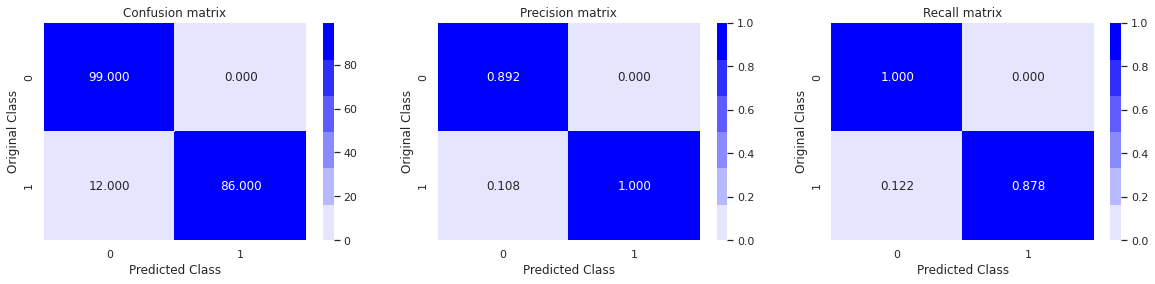

In [ ]:
knn_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

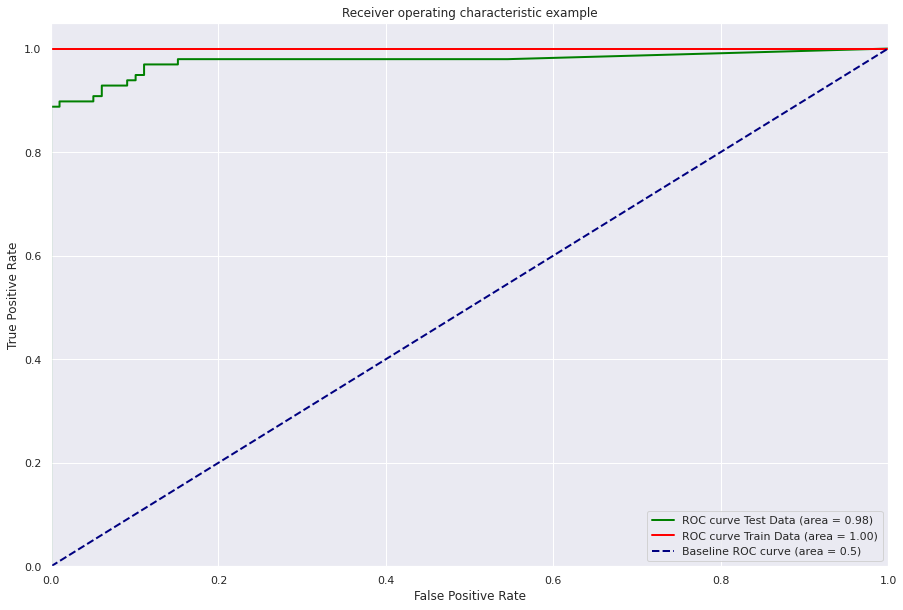

In [ ]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

### 2. Decision Trees Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier


st=dt.now()

tuned_parameters = {'max_depth': np.arange(1,10,1),
                    'criterion': ['gini','entropy'],
                    'min_samples_split': np.arange(0.1,1.0,0.1),
                    'min_samples_leaf' : np.arange(1,10,1),
                    'min_weight_fraction_leaf' : [0.0,0.1,0.2,0.3,0.4],
                    'max_features': ['auto','sqrt','log2']} 

model = DecisionTreeClassifier(random_state=state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=state,
                                )

rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Time taken to complete random search:  0:00:00.174118


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished


In [ ]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.1, presort='deprecated',
                       random_state=48, splitter='best')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'min_weight_fraction_leaf': 0.1, 'min_samples_split': 0.1, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 3, 'criterion': 'gini'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:00.005272


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.001767


---------------------
|      F1 Score      |
---------------------

    0.9187817258883249


---------------------
|      Accuracy      |
---------------------

    0.9187817258883249


---------------------
|      Recall        |
---------------------

    0.8469387755102041


---------------------
|      ROC AUC       |
---------------------

    0.9587713873428159


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.87      0.99      0.92        99
           1       0.99      0.85      0.91        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



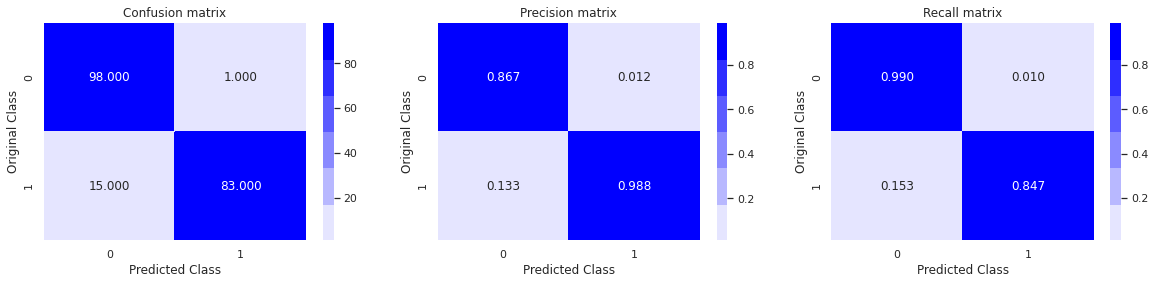

In [ ]:
dt_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

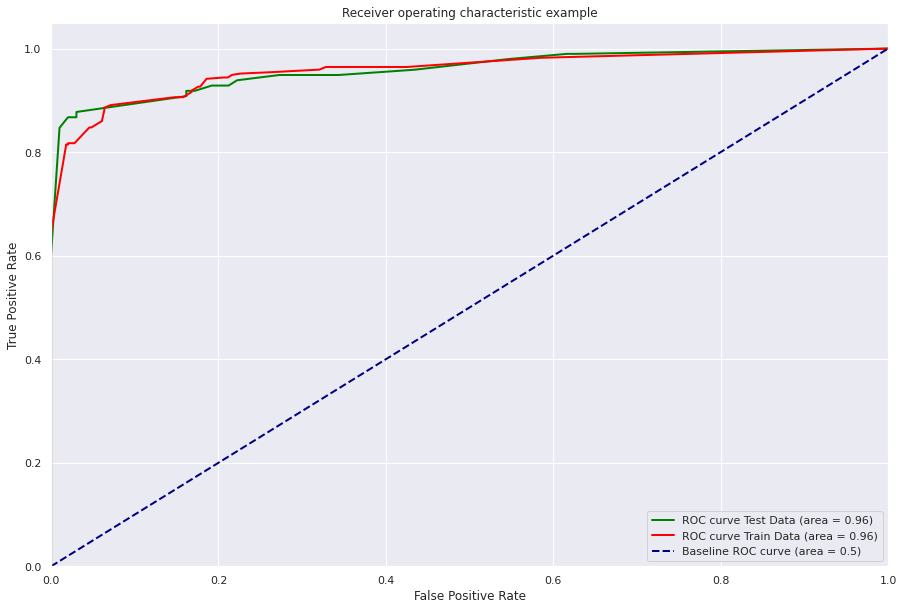

In [ ]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

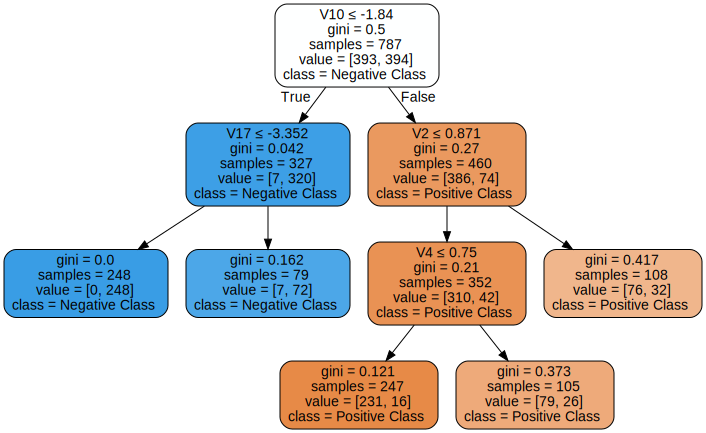

In [ ]:
#https://scikit-learn.org/stable/modules/tree.html
def visualize_tree(trained_clf, f_names, filename):
    from sklearn import tree
    import graphviz
    dot_data = tree.export_graphviz(decision_tree=trained_clf, out_file=None, max_depth=3, filled=True, rounded=True, special_characters=True, impurity=True, feature_names=f_names, class_names=['Positive Class','Negative Class'])  
    graph = graphviz.Source(dot_data)  
    graph.render(filename, format='png') 
    return graph

#Call the function above and pass a filename onto it.
f_names=[i for i in X_train.columns]

graph=visualize_tree(trained_model, f_names, 'Credit_Card_Tree.png')
graph

### 3. Linear SVM Classifier

In [ ]:
from sklearn.svm import SVC

st=dt.now()
tuned_parameters = {'C':np.logspace(-3,4,25), 
                    'gamma':np.logspace(-3,1,8)}

model = SVC(random_state=state)

rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=state)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Time taken to complete random search:  0:00:00.649094


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.6s finished


In [ ]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=46.41588833612782, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.003727593720314938, kernel='rbf', max_iter=-1, probability=False,
    random_state=48, shrinking=True, tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'gamma': 0.003727593720314938, 'C': 46.41588833612782}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9756552471866264



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:00.020938


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.002794


---------------------
|      F1 Score      |
---------------------

    0.9543147208121827


---------------------
|      Accuracy      |
---------------------

    0.9543147208121827


---------------------
|      Recall        |
---------------------

    0.9489795918367347


---------------------
|      ROC AUC       |
---------------------

    0.9861884147598433


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        99
           1       0.96      0.95      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



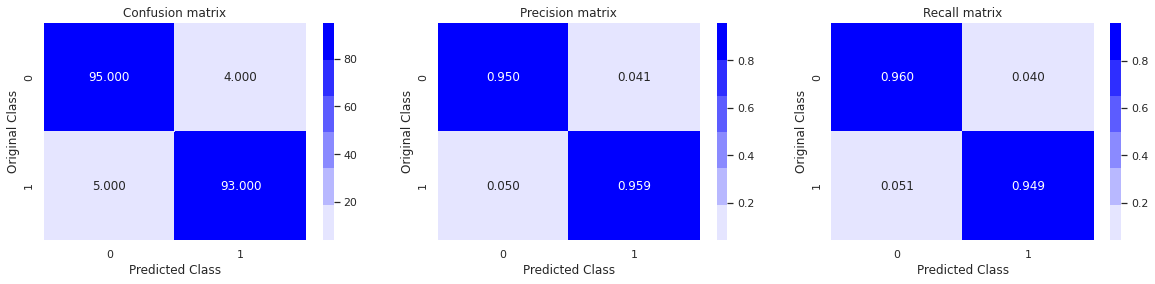

In [ ]:
svc_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

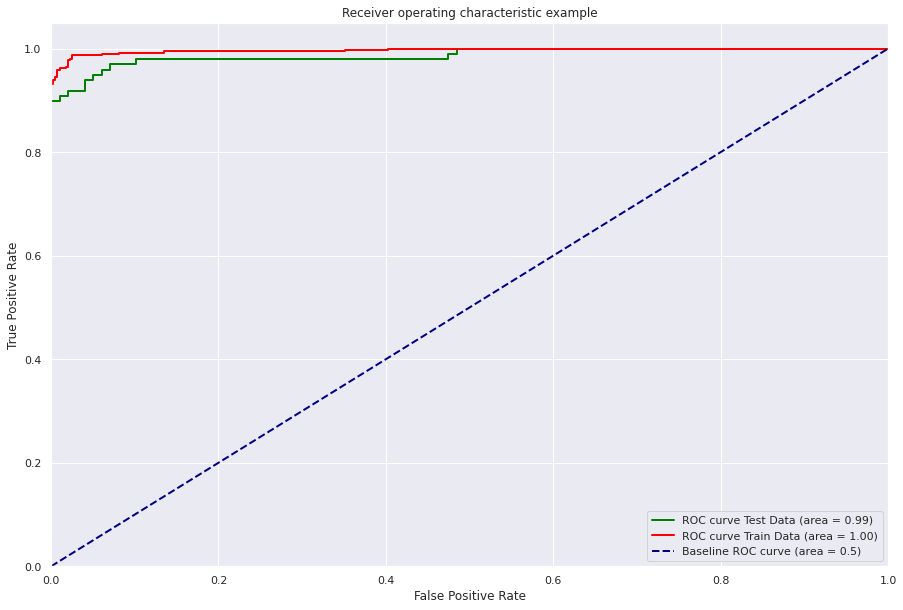

In [ ]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

### 4. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

st=dt.now()
tuned_parameters = {'max_depth':[3,4,5,6,7,8,9,10],
                    'criterion':['gini','entropy'],
                    'min_samples_split':[2,3,5,7,9], 
                    'max_features':['auto','sqrt', 'log2'],
                    'min_samples_leaf':[1, 10, 25, 50, 75, 100],
                    'n_estimators':[10,20,30,40,50,60,80,100,500,1000,1500,2000,3000],
                    'max_leaf_nodes':[None, 10, 25, 50, 100, 500]}

model = RandomForestClassifier(random_state=state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=state)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   47.7s finished


Time taken to complete random search:  0:00:51.671171


In [ ]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=1500,
                       n_jobs=None, oob_score=False, random_state=48, verbose=0,
                       warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'n_estimators': 1500, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_leaf_nodes': None, 'max_features': 'log2', 'max_depth': 7, 'criterion': 'entropy'}

---------------------------------
|   No of CrossValidation sets   |
----------------------

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:03.998276


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.120178


---------------------
|      F1 Score      |
---------------------

    0.934010152284264


---------------------
|      Accuracy      |
---------------------

    0.934010152284264


---------------------
|      Recall        |
---------------------

    0.8673469387755102


---------------------
|      ROC AUC       |
---------------------

    0.9833024118738404


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        99
           1       1.00      0.87      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



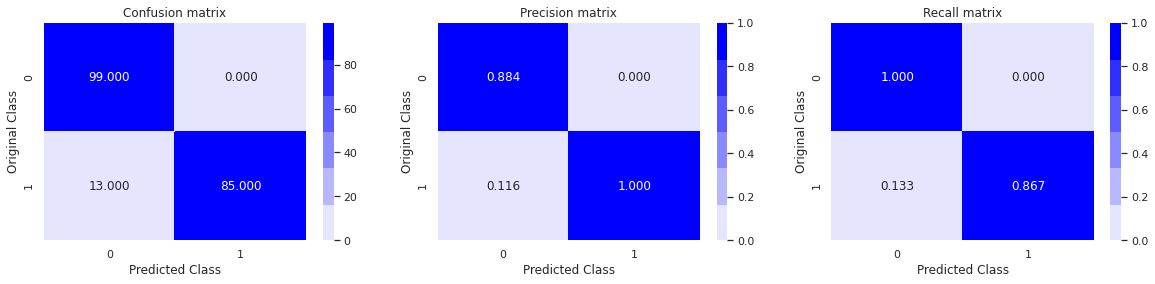

In [ ]:
rf_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

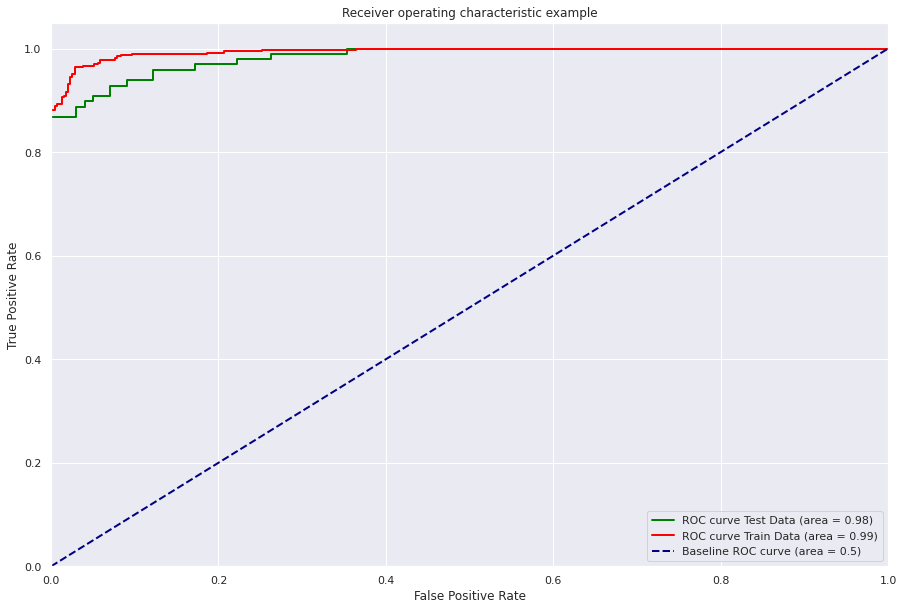

In [ ]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

### 5. XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

st=dt.now()
tuned_parameters = {'learning_rate':[0.1,0.01,0.001,0.0001],
                    'n_estimators':[10,25,50,100,250,500,650,750,850,1000,1500,2000,3000],
                    'subsample':[0.6,0.7,0.8],
                    'min_child_weight':[3,5,7,9],
                    'max_depth': [3,4,5,6,7,9,11,13,15,17,20,25,50],
                    'colsample_bytree':[0.6,0.7,0.8],
                    'gamma':[0,0.25,0.4,0.5,0.55,0.7,1]}

model = XGBClassifier(random_state=state)

rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=state)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.0s finished


Time taken to complete random search:  0:00:14.208919


In [ ]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.25,
              learning_rate=0.01, max_delta_step=0, max_depth=17,
              min_child_weight=3, missing=None, n_estimators=850, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=48,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'subsample': 0.6, 'n_estimators': 850, 'min_child_weight': 3, 'max_depth': 17, 'learning_rate': 0.01, 'gamma': 0.25, 'colsample_bytree': 0.8}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:01.178034


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.007489


---------------------
|      F1 Score      |
---------------------

    0.949238578680203


---------------------
|      Accuracy      |
---------------------

    0.949238578680203


---------------------
|      Recall        |
---------------------

    0.9387755102040817


---------------------
|      ROC AUC       |
---------------------

    0.9881467738610596


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        99
           1       0.96      0.94      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



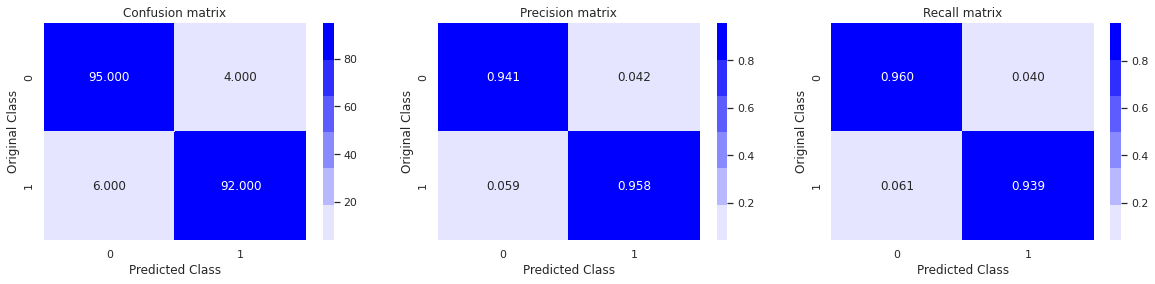

In [ ]:
xgb_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

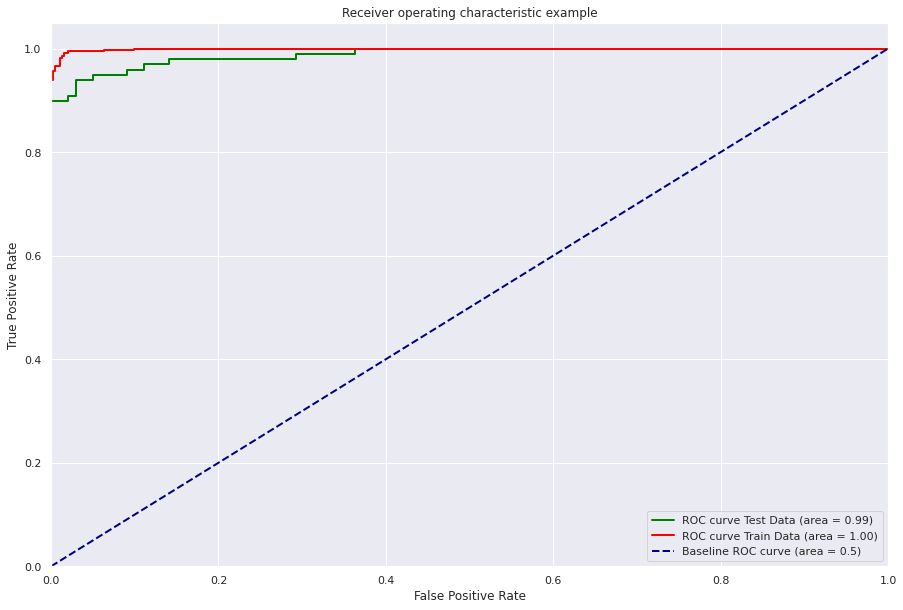

In [ ]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

In [99]:
print('\n                             Accuracy        Recall      ROC-AUC')
print('                            ----------      --------     --------')

print('KNN Classifier             : {:.04}%          {:.04}%       {:.04}'.format(knn_grid_results['Accuracy'] * 100, 
                                                                                  knn_grid_results['Recall'] * 100, 
                                                                                  knn_grid_results['ROC-AUC']))
print('Decision Trees Classifier  : {:.04}%          {:.04}%       {:.04}'.format(dt_grid_results['Accuracy'] * 100, 
                                                                                  dt_grid_results['Recall'] * 100,
                                                                                  dt_grid_results['ROC-AUC']))
print('Linear SVC                 : {:.04}%          {:.04}%       {:.04}'.format(svc_grid_results['Accuracy'] * 100, 
                                                                                  svc_grid_results['Recall'] * 100, 
                                                                                  svc_grid_results['ROC-AUC']))
print('Random Forest Classifier   : {:.04}%           {:.04}%       {:.04}'.format(rf_grid_results['Accuracy'] * 100, 
                                                                                  rf_grid_results['Recall'] * 100, 
                                                                                  rf_grid_results['ROC-AUC']))
print('XGBoost Classifier         : {:.04}%          {:.04}%       {:.04}'.format(xgb_grid_results['Accuracy'] * 100, 
                                                                                  xgb_grid_results['Recall'] * 100, 
                                                                                  xgb_grid_results['ROC-AUC']))


                             Accuracy        Recall      ROC-AUC
                            ----------      --------     --------
KNN Classifier             : 95.94%          91.84%       0.9821
Decision Trees Classifier  : 92.89%          86.73%       0.9527
Linear SVC                 : 93.91%          87.76%       0.9785
Random Forest Classifier   : 95.94%           91.84%       0.9799
XGBoost Classifier         : 95.94%          92.86%       0.98


### Split the original imbalanced dataset into train and test set

In [ ]:
from sklearn.model_selection import train_test_split

print("Shape of the original dataset: ", df.shape)

X=df.drop("Class", axis=1)
y=df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=state)

print('\nNumber of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])

Shape of the original dataset:  (284807, 31)

Number of data points in train data: 227845
Number of data points in test data: 56962


### Data Oversampling using SMOTE

In [ ]:
#Get information about the class labels before applying SMOTE
print("Before oversampling, number of fraud transactions: ",y_train.value_counts()[1])
print("Before oversampling, number of non fraud transactions: ",y_train.value_counts()[0])

Before oversampling, number of fraud transactions:  394
Before oversampling, number of non fraud transactions:  227451


In [ ]:
from imblearn.over_sampling import SMOTE
smote_obj = SMOTE(sampling_strategy='minority',random_state=state)

#Adding synthetic points at this stage
X_train, y_train = smote_obj.fit_sample(X_train, y_train)

In [ ]:
print("After oversampling, number of fraud transactions: ",sum(y_train==1))
print("After oversampling, number of non fraud transactions: ",sum(y_train==0))

After oversampling, number of fraud transactions:  227451
After oversampling, number of non fraud transactions:  227451


### 1. KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

st=dt.now()

tuned_parameters = {'n_neighbors': [3,5,7,9,11,13],
                    'weights': ['uniform','distance']}

model = KNeighborsClassifier(n_jobs=-1, p=2, metric='minkowski')

rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=5, scoring='roc_auc', 
                                n_jobs=-1,
                                verbose=5,
                                random_state=state)
rsearch_cv.fit(X_train, y_train)
task_type='GPU'
print("Time taken to complete random search: ",dt.now()-st)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 97.7min finished


Time taken to complete random search:  1:37:46.991162


In [ ]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='uniform')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'weights': 'uniform', 'n_neighbors': 13}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9996812502207479



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:03.144561


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:02:53.737767


---------------------
|      F1 Score      |
---------------------

    0.996243109441382


---------------------
|      Accuracy      |
---------------------

    0.996243109441382


---------------------
|      Recall        |
---------------------

    0.8571428571428571


---------------------
|      ROC AUC       |
---------------------

    0.932749406388892


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.30      0.86      0.44        98

    accuracy                           1.00     56962
   macro avg       0.65      0.93      0.72     56962
weighted avg       1.00      1.00      1.00     56962



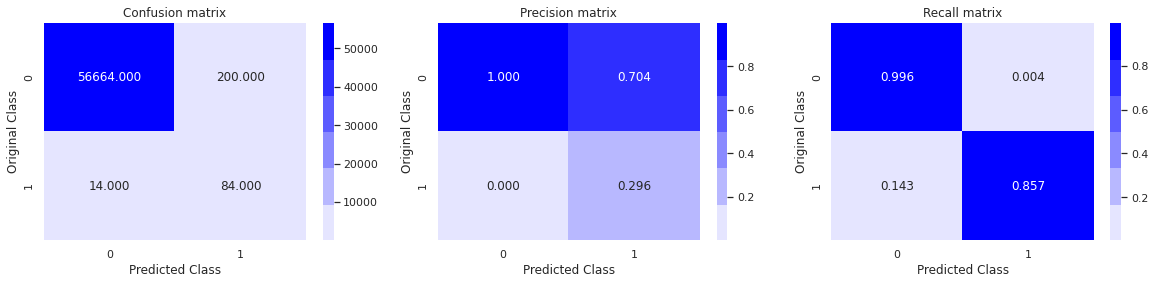

In [ ]:
knn_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train)

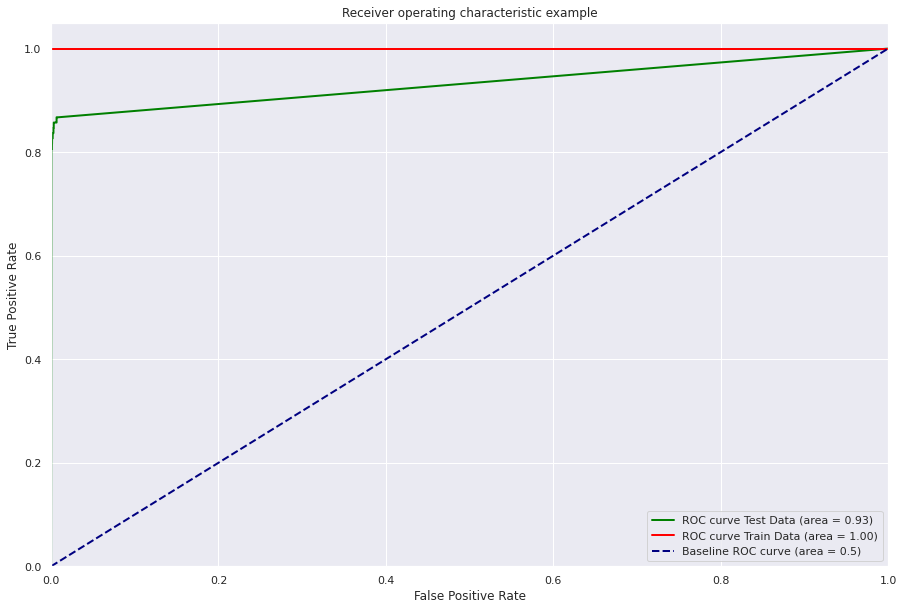

In [ ]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

### 2. Decision Trees Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier


st=dt.now()

tuned_parameters = {'max_depth': np.arange(1,10,1),
                    'criterion': ['gini','entropy'],
                    'min_samples_split': np.arange(0.1,1.0,0.1),
                    'min_samples_leaf' : np.arange(1,10,1),
                    'min_weight_fraction_leaf' : [0.0,0.1,0.2,0.3,0.4],
                    'max_features': ['auto','sqrt','log2']} 

model = DecisionTreeClassifier(random_state=state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=5, scoring='roc_auc', 
                                n_jobs=-1,
                                verbose=5,
                                random_state=state)
rsearch_cv.fit(X_train, y_train)
task_type='GPU'
print("Time taken to complete random search: ",dt.now()-st)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   19.1s finished


Time taken to complete random search:  0:00:20.399329


In [ ]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.1, presort='deprecated',
                       random_state=48, splitter='best')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'min_weight_fraction_leaf': 0.1, 'min_samples_split': 0.1, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 3, 'criterion': 'gini'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

### 3. Random Forest Classifier

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:01.112385


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.006636


---------------------
|      F1 Score      |
---------------------

    0.9846564376250834


---------------------
|      Accuracy      |
---------------------

    0.9846564376250834


---------------------
|      Recall        |
---------------------

    0.8163265306122449


---------------------
|      ROC AUC       |
---------------------

    0.9513358223846656


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.82      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.90      0.57     56962
weighted avg       1.00      0.98      0.99     56962



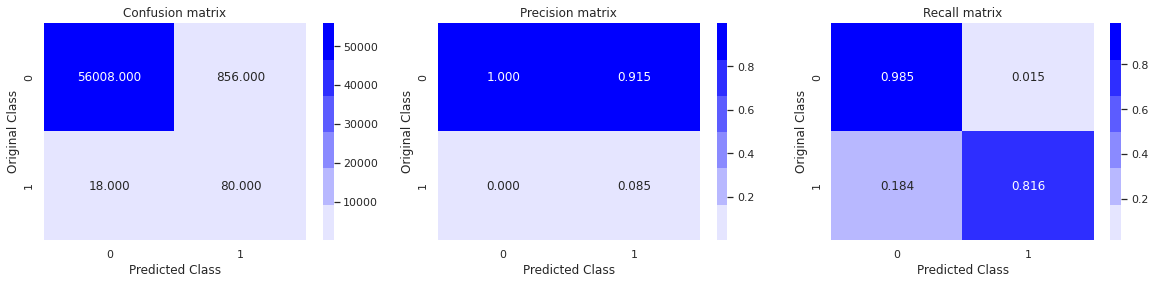

In [ ]:
dt_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train)

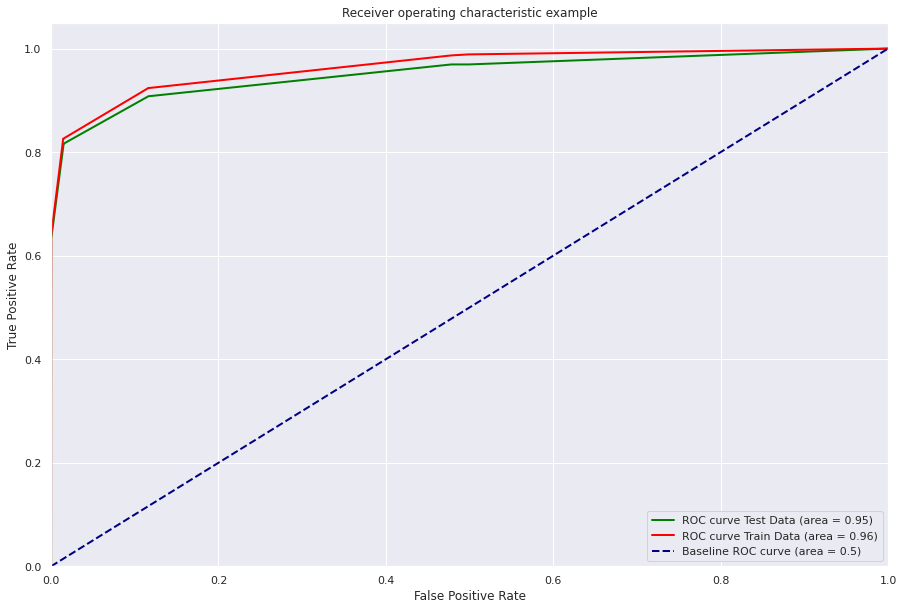

In [ ]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

In [38]:
from sklearn.ensemble import RandomForestClassifier

st=dt.now()
tuned_parameters = {'max_depth':[3,4,5,6,7,8,9,10],
                    'criterion':['gini','entropy'],
                    'min_samples_split':[2,3,5,7,9], 
                    'max_features':['auto','sqrt', 'log2'],
                    'min_samples_leaf':[1, 10, 25, 50, 75, 100],
                    'n_estimators':[10,20,30,40,50,60,80,100,500,1000,1500,2000,3000],
                    'max_leaf_nodes':[None, 10, 25, 50, 100, 500]}

model = RandomForestClassifier(random_state=state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=5, scoring='roc_auc', 
                                n_jobs=-1,
                                verbose=5,
                                random_state=state)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed: 252.8min remaining: 22.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 261.0min finished


Time taken to complete random search:  4:24:21.229768


In [39]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='sqrt', max_leaf_nodes=500,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=48, verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 25, 'max_leaf_nodes': 500, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'entropy'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	A

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:03:24.267284


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.446870


---------------------
|      F1 Score      |
---------------------

    0.9978406657069625


---------------------
|      Accuracy      |
---------------------

    0.9978406657069625


---------------------
|      Recall        |
---------------------

    0.8571428571428571


---------------------
|      ROC AUC       |
---------------------

    0.9787046501211627


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.44      0.86      0.58        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.72      0.93      0.79     56962
weighted avg       1.00      1.00      1.00     56962



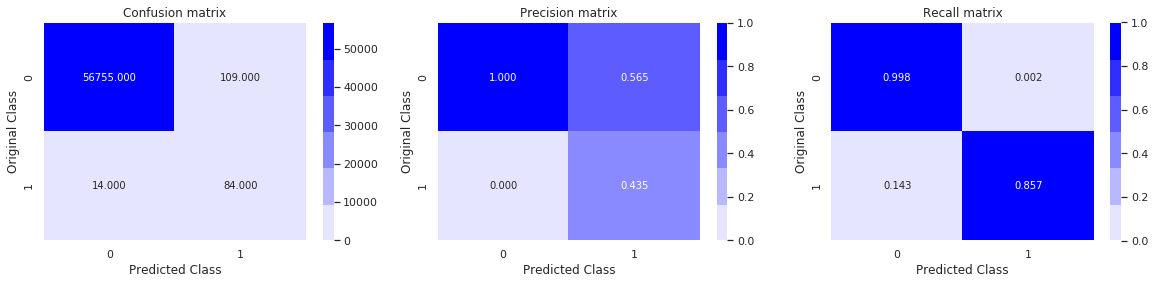

In [40]:
rf_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train)

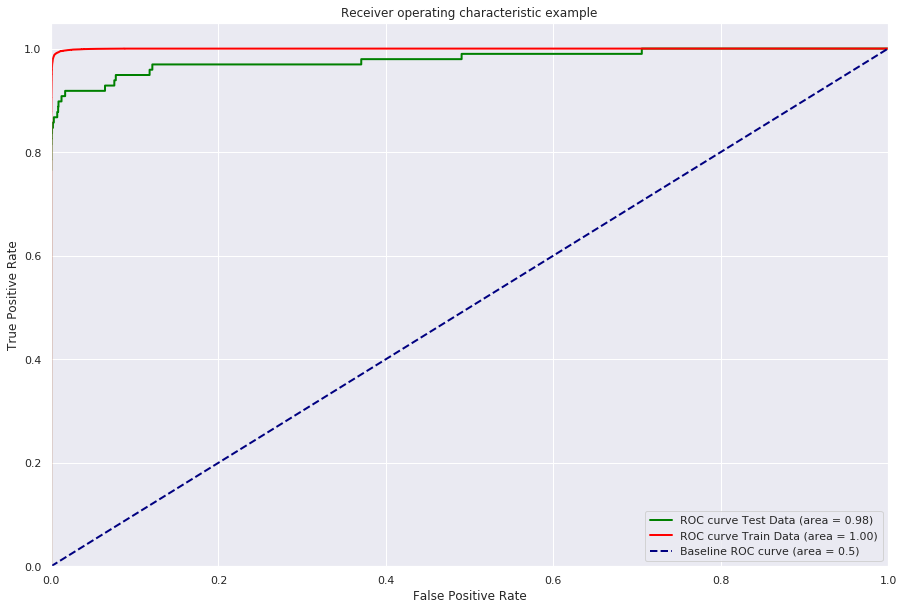

In [41]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

### 4. XGBoost Classifier

In [42]:
from xgboost import XGBClassifier

st=dt.now()
tuned_parameters = {'learning_rate':[0.1,0.01,0.001,0.0001],
                    'n_estimators':[10,25,50,100,250,500,750,1000,1500,2000,3000],
                    'subsample':[0.6,0.7,0.8],
                    'min_child_weight':[3,5,7,9],
                    'max_depth': [3,4,5,6,7,9],
                    'colsample_bytree':[0.6,0.7,0.8],
                    'gamma':[0,0.5,1]}

model = XGBClassifier(random_state=state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=5, scoring='roc_auc', 
                                n_jobs=-1,
                                verbose=5,
                                random_state=state)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed: 227.1min remaining: 19.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 233.4min finished


Time taken to complete random search:  4:17:40.461677


In [43]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=3, missing=None, n_estimators=750,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=48, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'subsample': 0.6, 'n_estimators': 750, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.8}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of bes

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:24:39.380942


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:02.056257


---------------------
|      F1 Score      |
---------------------

    0.9992802219023208


---------------------
|      Accuracy      |
---------------------

    0.9992802219023208


---------------------
|      Recall        |
---------------------

    0.826530612244898


---------------------
|      ROC AUC       |
---------------------

    0.9659689283704478


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.83      0.80        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.89      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962



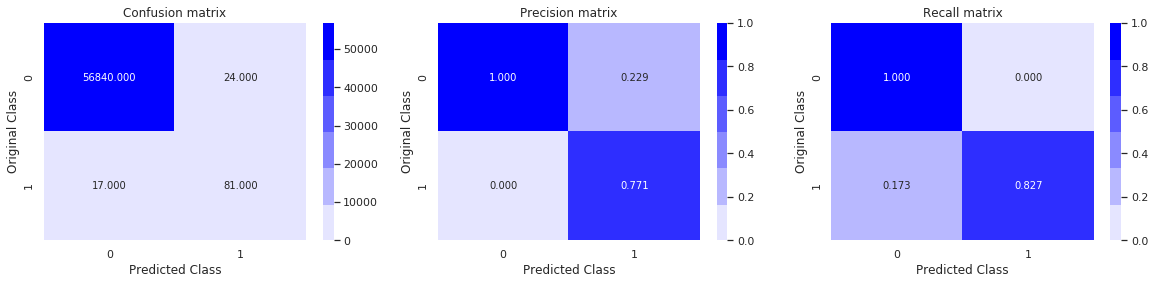

In [53]:
xgb_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test.values, y_test, class_labels=y_train)

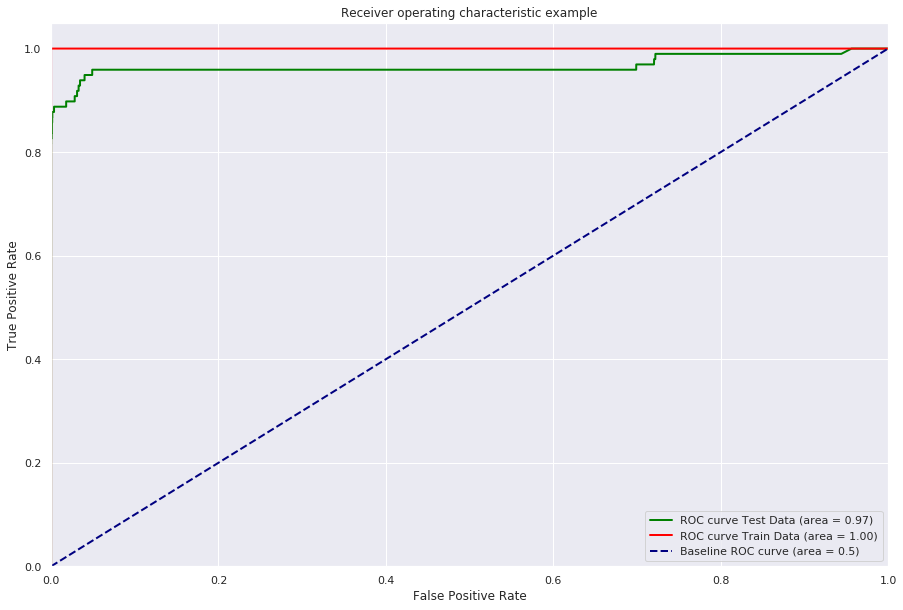

In [54]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

##  Model Building: ADASYN

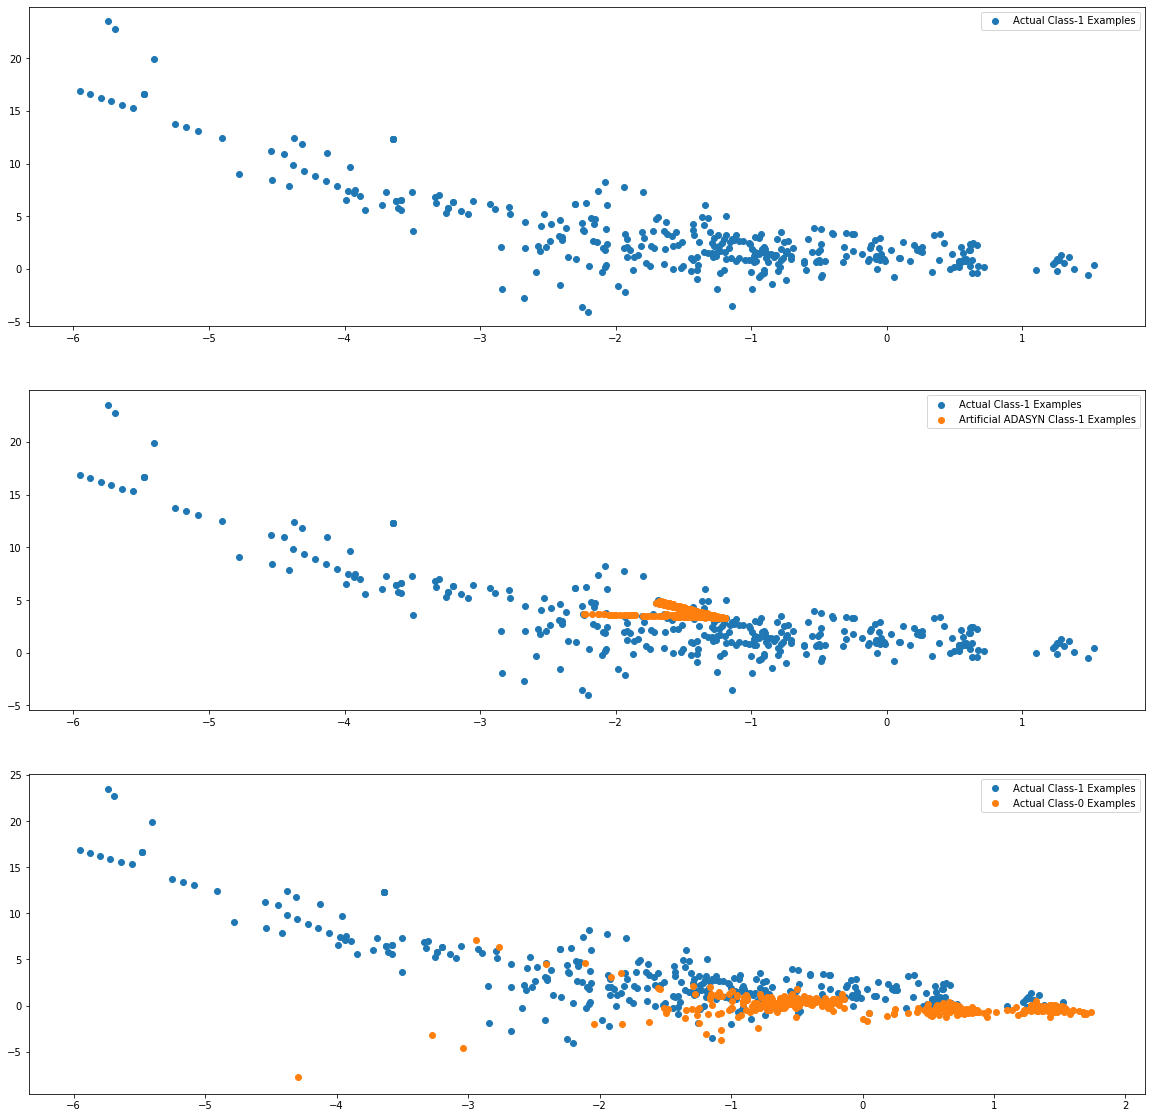

In [25]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
X_test_adasyn, y_test_adasyn = ada.fit_resample(X_test, y_test)

X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

# Machine Learning Model for ADASYN Balanced Data

### 1. Random Forest With ADASYN

In [19]:
# Perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

# Perform hyperparameter tuning

from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

random_grid = {'max_depth': [2,6,10,14],
          'n_estimators': [50,100,150]}

#perform hyperparameter tuning
rf1 = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random1 = RandomizedSearchCV(estimator = rf1, param_distributions = random_grid,scoring= 'roc_auc',
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1,return_train_score=True)

rf_random1.fit(X_train_adasyn, y_train_adasyn)

# Print the optimum value of hyperparameters
print(rf_random1.best_params_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  36 | elapsed: 11.2min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 12.8min finished


{'n_estimators': 100, 'max_depth': 14}


##### Optimal Model: Random Forest with ADASYN

In [26]:
clf4 = RandomForestClassifier(n_jobs=-1,max_depth=14,n_estimators=100)  
clf4.fit(X_train_adasyn, y_train_adasyn)
y_pred_un = clf4.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_un[:,1])) 

0.9763744429111684


### 2. XGBoost with ADASYN 

In [21]:
# Perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN
# Import the packages
from imblearn.over_sampling import ADASYN 
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

#perform hyperparameter tuning
param_grid = {'learning_rate': [0.2, 0.6], 
          'subsample': [0.3, 0.6, 0.9],
          'max_depth' : [2,3,5]
          }          

# specify model
xgb_model_ad1 = XGBClassifier(n_estimators=200)

# set up GridSearchCV()
model_cv_ad1 = GridSearchCV(estimator = xgb_model_ad1, 
                          param_grid = param_grid, 
                          scoring= 'roc_auc', 
                          cv = StratifiedKFold(n_splits=5, shuffle=True), 
                          verbose = 2,
                          n_jobs=-1,
                          return_train_score=True)  
model_cv_ad1.fit(X_train_adasyn, y_train_adasyn)

# Print the evaluation result by choosing a evaluation metric
y_pred_ad1 = model_cv_ad1.predict(X_test_adasyn)
print(roc_auc_score(y_test_adasyn, y_pred_ad1))

# Print the optimum value of hyperparameters
print(model_cv_ad1.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 72.3min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 195.0min finished


0.8390932178717856
{'learning_rate': 0.6, 'max_depth': 5, 'subsample': 0.6}


##### Optimal Model: XGBoost with ADASYN

In [38]:
# Initialise the model with optimum hyperparameter

clf_ad = XGBClassifier(max_depth=5, n_estimators=200,learning_rate = 0.6, subsample = 0.6,objective = 'binary:logistic')
clf_ad.fit(X_train_adasyn, y_train_adasyn)
y_pred_ad_f = clf_ad.predict_proba(X_test)

# Print the evaluation score on the X_test
print(roc_auc_score(y_test, y_pred_ad_f[:,1]))

0.974127550963825


### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model and Predict on the test dataset

In [88]:
# perform the best oversampling method on X_train & y_train

clf_final1 = XGBClassifier(max_depth=5, n_estimators=200,learning_rate = 0.6, subsample = 0.6,objective = 'binary:logistic')

# fit on the balanced dataset
clf_final1.fit(X_train_adasyn, y_train_adasyn)
y_pred_final = clf_final1.predict_proba(X_test)

# Print the evaluation score on the X_test
print(roc_auc_score(y_test, y_pred_final[:,1]))

0.974127550963825


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


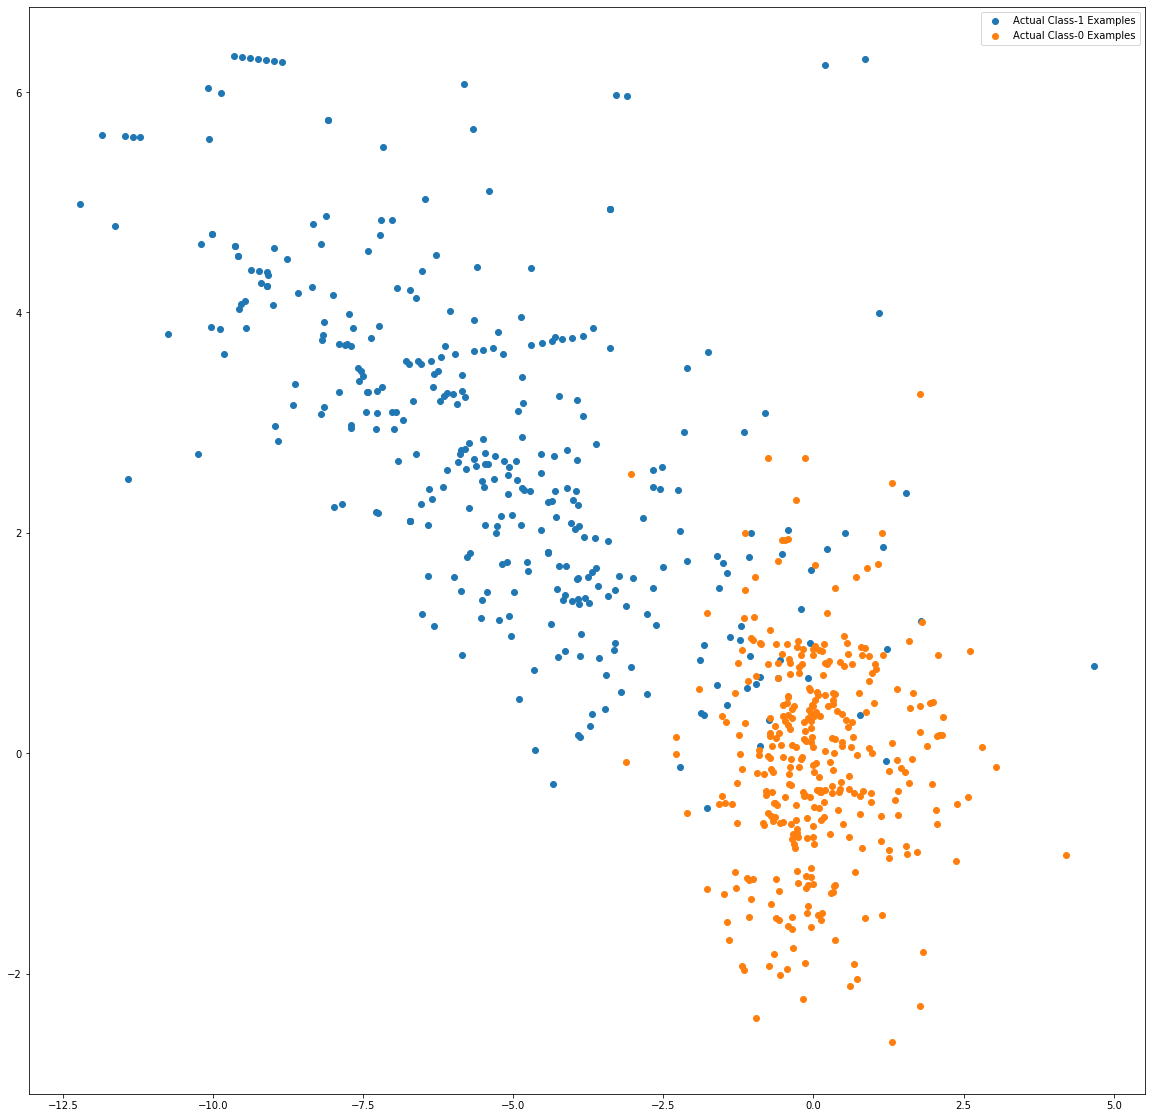

In [89]:
var_imp1 = []
for i in clf_final1.feature_importances_:
    var_imp1.append(i)
print('Top var =', var_imp.index(np.sort(clf_final.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf_final.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf_final.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index1 = var_imp1.index(np.sort(clf_final1.feature_importances_)[-1])
second_top_var_index1 = var_imp1.index(np.sort(clf_final1.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]

plt.scatter(X_train_1[:, top_var_index1], X_train_1[:, second_top_var_index1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index1], X_train_0[:X_train_1.shape[0], second_top_var_index1],
            label='Actual Class-0 Examples')
plt.legend()

In [90]:
#Let's first form a function to get all evaluation metrics at one time

from sklearn.metrics import confusion_matrix,classification_report,precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve, f1_score

def metrics_dataframe1(actual, predicted):
    confusion = confusion_matrix(actual, predicted)
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    specificity = TN/float(TN+FP)
    accuracy = accuracy_score(actual, predicted)
    F1_score = f1_score(actual, predicted)
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    false_positive_rate = FP/float(TN+FP)
    positive_predictive_value = TP/float(TP+FP)
    negative_predictive_value = TN/float(TN+ FN)
    
    return_data = {'Metric': ['Specificity', 'Accuracy', 'F1 Score','Precision', 'Sensitivity/Recall', 'False Positive Rate',
                             'Positive Predictive Value', 'Negative Predictive Value'],
                   'Score': [specificity, accuracy,F1_score, precision, recall, false_positive_rate, positive_predictive_value,
                            negative_predictive_value]}
    return pd.DataFrame.from_dict(return_data)

In [91]:
#Predicting the probabilities
y_pred_final = pd.DataFrame({'converted':y_test,'converted_probability':y_pred_final[:,1]})
y_pred_final.head()

,converted,converted_probability
186882,0,7.323756e-11
165754,0,5.304494e-11
235285,0,9.902174e-09
101271,0,2.643939e-07
5832,0,4.788030e-06


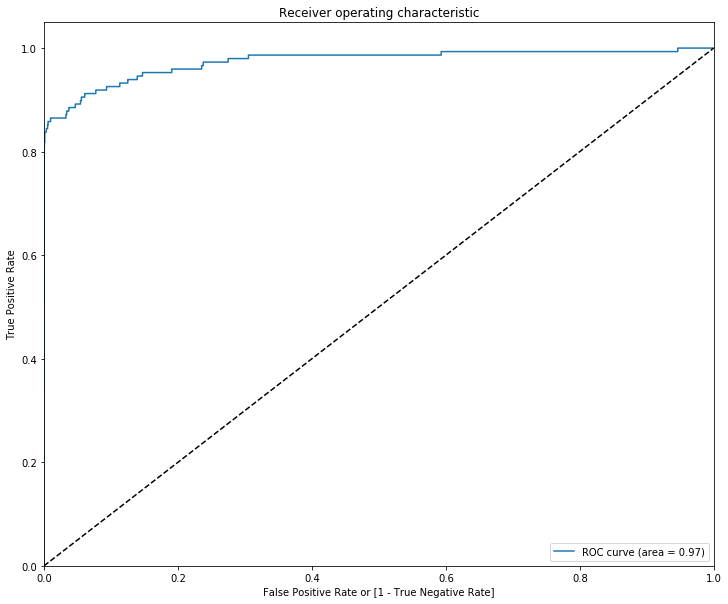

In [92]:
#### Print the FPR,TPR & select the best threshold from the roc curve

#Defining the function for plotting the ROC curve
from sklearn.metrics import roc_curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = roc_curve(y_pred_final.converted,
                                         y_pred_final.converted_probability, drop_intermediate=False )

#PLotting the ROC curve
plt.figure(figsize=(12, 10))
draw_roc(y_pred_final.converted, y_pred_final.converted_probability)

In [93]:
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

0.0005550518


In [94]:
predicted_final_train = y_pred_final.converted_probability.map( lambda x: 1 if x > threshold else 0)

In [95]:
print(confusion_matrix(y_pred_final.converted, predicted_final_train))
metrics_dataframe1(y_pred_final.converted, predicted_final_train)

[[84466   829]
 [   21   127]]


,Metric,Score
0,Specificity,0.990281
1,Accuracy,0.990052
2,F1 Score,0.230072
3,Precision,0.132845
4,Sensitivity/Recall,0.858108
5,False Positive Rate,0.009719
6,Positive Predictive Value,0.132845
7,Negative Predictive Value,0.999751


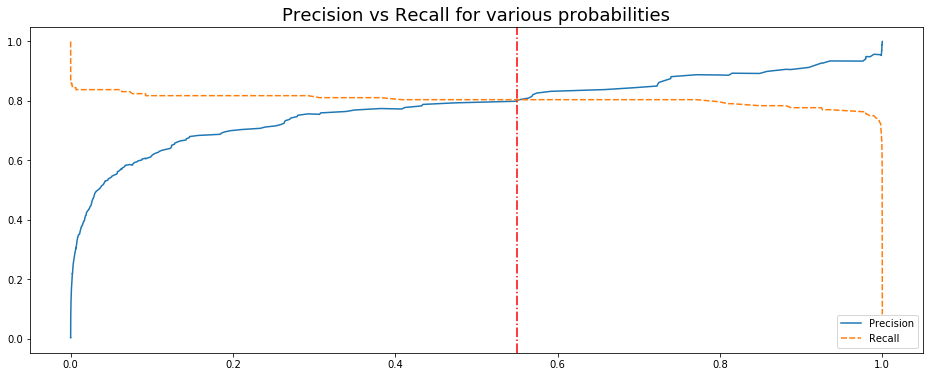

In [61]:
# Probability Distribution of Precision-Recall

from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_pred_final.converted, y_pred_final.converted_probability)

cutoff_df = pd.DataFrame({'Precision': pd.Series(p[:-1], index=thresholds),
              'Recall':pd.Series(r[:-1], index=thresholds)})
cutoff_df.head()


# Plot the trade-off
plt.figure(figsize=(16, 6))
sns.lineplot(data=cutoff_df)
plt.title('Precision vs Recall for various probabilities', fontsize=18)
plt.axvline(0.55, color='r', linestyle='-.')

In [62]:
#Evaluating the metrics on optimum threshold

threshold=0.55
predicted_final_train = y_pred_final.converted_probability.map( lambda x: 1 if x > threshold else 0)
print(confusion_matrix(y_pred_final.converted, predicted_final_train))
metrics_dataframe1(y_pred_final.converted, predicted_final_train)

[[85266    29]
 [   29   119]]


,Metric,Score
0,Specificity,0.999660
1,Accuracy,0.999321
2,F1 Score,0.804054
3,Precision,0.804054
4,Sensitivity/Recall,0.804054
5,False Positive Rate,0.000340
6,Positive Predictive Value,0.804054
7,Negative Predictive Value,0.999660


### Conclusion:
What are our main goals for this problem?

1. We will leverage the the very small data that is provided to us.
2. We will implement standard outlier detection algorithms like LOF and see how successful they are in detecting fradulent transactions.
3. For implementing Machine Learning models, we will follow two approaches for resampling ofour data: 
First, we will undersample the data and create a balanced dataset containing equal number of points from both the classes.
Second, we will oversample the dataset by adding synthetic points using SMOTE sampling technique.
4. We will also leverage the concept of Autoencoders and build an encoder-decoder neural network which will be used to learn the low level representations of the transformed PCA data. 
5. Lastly, we will compare all our models and see which models turns out to better than the rest.

 * Out of `148` fraud transaction in test, Our Model is able correctly identify `127` samples and missed `21` samples while considering 0.00055 as our threshold.
 * We can increase the the fraud detection rate by decreasing the threshold but that will depend on the client as it will impact false negatives score as well.
 * For this scenario we are keeping a low threshold so that we can correctly identify fraud transactions. On the negative side we are identifying some of the valid transactions as fraud which will impact customers mindset.
 * After finding the optimum threshold from the Precision-Recall curve, we observe that there is an increase in Precision and decrease in Recall though we are identifying lesser frauds but False positive count has decreased significantly.
 * PFB  some Stats we got from all the models we have trained 
 
 #### XGBOOST is the best choice for this dataset to develop a predictive machine learning model as it's magnificent with bot balanced and imbalanced datasets